In [1]:
import pandas as pd

In [2]:
%pip install -U google-cloud-bigquery pandas pyarrow db-dtypes


Note: you may need to restart the kernel to use updated packages.


In [3]:
from google.cloud import bigquery
from google.oauth2 import service_account

# 1) (권장) 서비스 계정
# creds = service_account.Credentials.from_service_account_file("/path/key.json")
# client = bigquery.Client(project="YOUR_PROJECT_ID", credentials=creds)

# 2) 또는 gcloud 로컬 로그인 사용
#   gcloud auth application-default login
client = bigquery.Client(project="bubbly-axiom-470206")

sql = """
SELECT *
FROM `test_ad_list.ads_domain_list`
ORDER BY row_id
"""
df = client.query(sql).to_dataframe()  # CSV 없이 바로 DF
print(df.head())

DefaultCredentialsError: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.

DefaultCredentialsError: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.

In [4]:
ads_domain = pd.read_csv("/Users/Jiwon/Documents/GitHub/final_project/Jiwon/광고도메인.csv")

In [5]:
ads_domain

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
0,6508,3u4lOKJAek,13,335,3,10,스마트피싱보호,https://seimg.pincrux.com/icon/1551770735.png,"[상품소개]\n알면 피하고, 모르면 당하는 보이스피싱\n나와 소중한 가족을 안전하게...",서비스 가입,...,9999-12-31 00:00:00,0,100,7,1400,1100,2381500,NONE,2020-04-23 17:53:01 UTC,금융\n
1,6985,SijDrtH4GV,13,335,3,7,DB손해보험 다이렉트,https://seimg.pincrux.com/icon/1575337232.jpg,[참여방법]\n- 빠르고 간편한 DB손해보험 다이렉트에서\n- 내 차 보험료를 지금...,내차 보험료 조회,...,9999-06-06 00:00:00,0,100,7,2700,2300,1201938,NONE,2020-06-30 15:22:59 UTC,금융\n
2,8327,k1RZftVHoW,13,335,3,10,파일썬,https://static.i-screen.kr/img/ad/icon/aff_13_...,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 ...,첫 결제,...,9999-12-31 23:59:00,0,100,7,3200,2420,1673458,NONE,2020-11-10 11:21:43 UTC,미디어/컨텐츠\n
3,9264,EGZcaVOtlc,23,220,3,10,하나 가득담은 운전자보험가입,https://i.imgur.com/kaWiYyT.png,하나손해보험 다이렉트 운전자보험 가입시\n\n01.참여방법\n1) 계산하기 페이지를...,보험 가입 완료,...,9999-12-31 23:59:59,0,100,7,11000,8250,2372800,NONE,2020-11-30 15:16:45 UTC,금융\n
4,9716,NwZZq45Kgb,6,10,3,8,베이비러브 참여 신청,https://nextapps-nas.aws.appang.kr/icon/SDl2uC...,[참여방법]\n- 페이지 이동 > 베이버러브 참여신청 완료\n- 25-55세 SKT...,참여신청 (25세 ~ 55세),...,2029-11-29 00:00:00,25,55,2,600,480,2699900,NONE,2021-01-11 16:11:27 UTC,생활\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9512,446899,U80Aed1tRq,86,1655,3,4,원스토몰 180212,https://cashplan-r2.uk/quiz-mission.png,[참여방법]\n1. 본문에서 퀴즈와 상품/장소 확인\n1-1. 퀴즈: 4번째 태그 ...,네이버스마트스토어 퀴즈,...,9999-12-31 23:59:59,0,100,7,18,12,1369916,ADS_CODE_DAILY_UPDATE,2025-08-25 09:37:27 UTC,커머스\n
9513,446900,dfX4EjOsTE,86,1655,3,4,서빙카트 식당 업소용 주방 서빙카 다용도 서빙카트 소형 2단 기본고무바퀴 180213,https://cashplan-r2.uk/quiz-mission.png,[참여방법]\n1. 본문에서 퀴즈와 상품/장소 확인\n1-1. 퀴즈: 7번째 태그 ...,네이버스마트스토어 퀴즈,...,9999-12-31 23:59:59,0,100,7,18,12,1369915,ADS_CODE_DAILY_UPDATE,2025-08-25 09:42:08 UTC,**식당/카페**\n
9514,446902,rc7EZrAoQw,57,84,3,8,[네이버카페가입인사] 대장TV,https://lh3.googleusercontent.com/Zt1Ac3OOTTTa...,<< 적립방법 >>\n\n1. 최초 참여시 네이버 로그인 진행\n\n2. 카페 가입...,참여,...,2030-12-27 00:00:00,0,100,7,200,150,2735900,NONE,2025-08-25 10:06:15 UTC,미디어/컨텐츠\n
9515,446908,HRMcs0VIjL,13,335,2,0,NOL,https://seimg.pincrux.com/icon/1756085578.5054...,[참여방법]\n- 앱에 접속하시면 리워드가 지급됩니다.\n\n[주의사항]\n- 리워...,최초 오픈,...,9999-12-31 23:59:59,0,100,2,230,180,1682806,NONE,2025-08-25 10:37:10 UTC,금융\n


In [6]:
import re

# 앞뒤 공백/개행/별표 제거 → "식당카페", "**식당/카페**\n" 같은 변형도 먼저 정리
ads_domain["result"] = (ads_domain["result"].astype(str)
    .str.replace(r'(\\n|[\r\n])+', '', regex=True)   # 실제/리터럴 개행 제거
    .str.replace(r'^\*+|\*+$', '', regex=True)       # 앞뒤 ** 제거
    .str.strip()
)

# "식당카페", "식당 / 카페", "식당/카페" 등 모두 표준 라벨로 통일
mask = ads_domain["result"].str.contains(r'^\s*식당\s*/?\s*카페\s*$', regex=True, na=False)
ads_domain.loc[mask, "result"] = "식당/카페"

KeyError: 'result'

In [7]:
ads_domain['result'].unique()

KeyError: 'result'

# 매체사별

In [8]:
time_info = pd.read_csv("/Users/Jiwon/Documents/GitHub/final_project/Jiwon/수정_시간별적립보고서(최종).csv")

In [9]:
time_info

,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_acost,rpt_time_earn,weekday,week_type
0,2025-07-27,0,11059,398,5,0,0,0,6,주말
1,2025-07-27,0,13209,583,3,0,0,0,6,주말
2,2025-07-27,0,13928,303,3,3,510,360,6,주말
3,2025-07-27,0,13928,324,3,3,510,360,6,주말
4,2025-07-27,0,13928,340,6,6,1020,720,6,주말
...,...,...,...,...,...,...,...,...,...,...
279911,2025-08-25,11,446855,563,15,2,36,28,0,주중
279912,2025-08-25,11,446902,270,1,0,0,0,0,주중
279913,2025-08-25,11,446909,562,3,2,36,28,0,주중
279914,2025-08-25,11,446909,563,51,7,126,98,0,주중


# 유저

In [99]:
participate = pd.read_csv("/Users/Jiwon/Documents/GitHub/final_project/Jiwon/수정_광고참여정보.csv")

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
rewards = pd.read_csv("/Users/Jiwon/Documents/GitHub/final_project/Jiwon/수정_광고적립.csv")

In [ ]:
rewards

,rwd_idx,ads_idx,ads_code,mda_idx,pub_sub_rel_id,dvc_idx,advid,click_key,adv_cost,earn_cost,click_date,regdate,ctit
0,238304818,413490,CFZ6lzEmeD,22,27496512,32947806,09b6a808-4f76-4584-87c5-626f21f472a0,b0e22dba943810794d25c993dff425c4e16d0744,190,120,2025-07-26 00:00:31,2025-07-26 00:05:02,271
1,238304829,413490,CFZ6lzEmeD,22,27496512,47387244,ba4fd0c8-4f06-4dfa-9c3f-c6b39ee7066e,0679ff4c6a14beba296e44d7ffdd88129f42ffbf,190,120,2025-07-26 00:00:32,2025-07-26 00:08:17,465
2,238304816,413490,CFZ6lzEmeD,22,27496512,32425124,64c675d0-8edd-4478-9906-a806651fdf92,68eb28d636724061da21e490a1afff6a39cd78f7,190,120,2025-07-26 00:00:42,2025-07-26 00:04:43,241
3,238304817,413490,CFZ6lzEmeD,22,27496513,34006545,a08ebb04-e70a-4492-89d4-17fa96bf8c75,37da42f12b6f732d8c8bf1a609c01e569b7f8a09,190,120,2025-07-26 00:00:54,2025-07-26 00:04:45,231
4,238304802,133653,rl8ud4uNQC,801,1,56867331,dbe54f40-41b5-4423-ae2f-048fd6ecf5af,624b1bbc57c9ea81005c74e1956d48e76d974816,260,195,2025-07-26 00:01:07,2025-07-26 00:02:04,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475026,239780599,356956,1UNE1La9yv,270,1,35431157,56296bc1-c155-4fa7-9888-72b195653deb,3dc358e1a2b6a3480ba45dc65f81a308bc6c5e70,5,3,2025-08-25 11:32:34,2025-08-25 11:32:44,10
1475027,239780621,445907,0gEJGntDo3,794,1,62076634,d46f85a9-e8e0-4017-8354-e93b0ffc5ffe,d3a189157fc1c3b458b44e485a38ad544b89402d,170,30,2025-08-25 11:32:37,2025-08-25 11:34:29,112
1475028,239780617,446855,yrwq08KCov,563,1,60605730,666272a3-4181-4635-84e7-de1df1008ace,c752e95c5a236c8799cbcf4dc516b7e09e1afda7,18,14,2025-08-25 11:32:47,2025-08-25 11:33:55,68
1475029,239780609,446837,2hznDD8Yx3,371,1,46271340,c91a2823-8a33-4d36-8900-966448fd0e56,4dc015e177c38a9d2d0cf65d2b2e146e79352683,13,9,2025-08-25 11:33:07,2025-08-25 11:33:15,8


In [ ]:
# 참여정보 적립 정보 조인

# rewards에서 click_key 외의 겹치는 컬럼들 제거
overlap_cols = set(participate.columns) & set(rewards.columns) - {'click_key'}
rewards_clean = rewards.drop(columns=overlap_cols)

records = participate.merge(rewards_clean, on='click_key', how='left')

In [ ]:
records['conversion'] = records['ctit'].notna().astype(int)
records

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,...,network,user_ip,rwd_idx,ads_code,advid,adv_cost,earn_cost,regdate,ctit,conversion
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,...,0,16.184.28.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,...,NaN,35.78.117.76,238313226.0,yuRe4YoPuZ,40ceb01c-9b60-4452-bacd-0e061fb18ab4,180.0,170.0,2025-07-26 02:19:21,57.0,1
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,...,WIFI,39.7.55.192,239017177.0,WuIp8HKmt9,73793f44-a471-4351-ae1c-d09accaf223a,170.0,120.0,2025-08-12 18:19:21,82.0,1
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,...,0,211.252.100.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,...,0,3.38.148.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,144350110,5400,3800,2025-08-16,23,2025-08-16 23:57:32,...,0,122.32.24.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,144350110,3600,2700,2025-08-18,15,2025-08-18 15:16:57,...,0,13.125.212.103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16854862,fffffc10523f96c3a470ef1c9ad6b930cb5d27b5,444350,61242190,58,33306660,180,170,2025-08-20,1,2025-08-20 01:02:48,...,NaN,43.206.110.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,144350110,6000,4500,2025-08-15,12,2025-08-15 12:04:56,...,0,115.40.102.142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
# records 컬럼 리스트
records.columns

Index(['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id',
       'contract_price', 'media_price', 'click_day', 'click_time',
       'click_date', 'exp_day', 'network', 'user_ip', 'rwd_idx', 'ads_code',
       'advid', 'adv_cost', 'earn_cost', 'regdate', 'ctit', 'conversion'],
      dtype='object')

In [ ]:
ads_list = pd.read_csv("/Users/Jiwon/Documents/GitHub/final_project/Jiwon/광고도메인.csv")

In [ ]:
# 도메인명 정제

ads_list = pd.read_csv("/Users/Jiwon/Documents/GitHub/final_project/Jiwon/광고도메인.csv")
ads_list

import re
import pandas as pd

ALLOWED = [
    "게임","뷰티","커머스","의료/건강","금융","미디어/컨텐츠","식음료","생활",
    "채용","운세","식당/카페","운동/스포츠","교육","비영리/공공","기타"
]

PATTERNS = [
    (r'\b게임\b', "게임"),
    (r'\b뷰티\b', "뷰티"),
    (r'\b커머스\b', "커머스"),
    (r'의료\s*/?\s*건강', "의료/건강"),
    (r'\b금융\b', "금융"),
    (r'미디어\s*/?\s*[컨콘]텐츠|미디어콘텐츠', "미디어/컨텐츠"),
    (r'\b식음료\b', "식음료"),
    (r'\b생활\b', "생활"),
    (r'\b채용\b', "채용"),
    (r'\b운세\b', "운세"),
    (r'식당\s*/?\s*카페|식당카페', "식당/카페"),
    (r'운동\s*/?\s*스포츠|운동스포츠', "운동/스포츠"),
    (r'\b교육\b', "교육"),
    (r'비영리\s*/?\s*공공', "비영리/공공"),
    (r'\b기타\b', "기타"),
]

def normalize_domain(text: str) -> str:
    if pd.isna(text):
        return "기타"
    s = str(text)

    # 1) JSON 형태면 값만 추출
    m = re.search(r'"domain"\s*:\s*"([^"]+)"', s)
    if m:
        s = m.group(1)

    # 2) 포매팅/개행 제거
    s = re.sub(r'(\\n|[\r\n])+', ' ', s)           # 개행 제거
    s = re.sub(r'[`"*#]+', '', s)                 # 서식문자 제거
    s = s.strip()

    # 3) 허용 라벨 패턴 찾기
    for pat, lab in PATTERNS:
        if re.search(pat, s):
            return lab

    # 4) 라벨명이 정확히 쓰인 경우(여분 텍스트 동반)
    for lab in ALLOWED:
        if lab in s:
            return lab

    return "기타"

# 사용: df["result"] → 표준라벨
ads_list["domain"] = ads_list["domain"].apply(normalize_domain)

In [ ]:
ads_list['domain'].unique()

array(['금융', '미디어/컨텐츠', '생활', '게임', '뷰티', '커머스', '식음료', '운동/스포츠', '의료/건강',
       '운세', '식당/카페', '교육', '채용', '기타', '비영리/공공'], dtype=object)

In [ ]:
ads_list['domain'].isna().mean()

np.float64(0.0)

In [ ]:
ads_list.to_csv("광고도메인리스트.csv")

In [ ]:
ads_list.columns

Index(['ads_idx', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type', 'ads_category',
       'ads_name', 'ads_icon_img', 'ads_summary', 'ads_save_way',
       'ads_day_cap', 'ads_sdate', 'ads_edate', 'ads_age_min', 'ads_age_max',
       'ads_os_type', 'ads_contract_price', 'ads_reward_price', 'ads_order',
       'ads_rejoin_type', 'regdate', 'domain'],
      dtype='object')

In [ ]:
ads_list_cln = ads_list.copy()

ads_list_cln = ads_list.drop

In [ ]:
ads_list['ads_save_way'].unique()

array(['서비스 가입', '내차 보험료 조회', '첫 결제', '보험 가입 완료', '참여신청 (25세 ~ 55세)',
       '포인트로 영화예매권 교환', '네이버 뉴스 구독', '최초 설치 후 레벨 27 달성', '구매', '캐릭터 생성',
       '모든 서브퀘스트 완료', '팔로우 후 친한 친구 리스트 추가', '회원가입 후 로그인', '최초 회원가입', '받기',
       '이벤트 참여', '스크린샷 업로드', '보험가입', '무료체험 신청', '최초 결제',
       '회원가입 및 무료이용권 사용', '회원가입', '최초 오픈 후 금융자산 연결', '영화할인권 무료교환', '좋아요',
       '네이버뉴스 구독', '서비스 가입 ', '가입', '구독 + 좋아요', '7일간 무료체험 신청',
       '레벨 100 클리어', '7000코인 획득', '레벨100 클리어', '레벨 70 달성',
       '3초 퀴즈 후 카카오 로그인', '이벤트 참여 완료', '견적조회', '계정생성 후 심사요청', '참여',
       '카카오톡 채널추가', '참여 하기', '컴퓨터화 제재소에 도달', '구독 및 좋아요', '최초 회원가입+성인인증',
       '최초 오픈', '팔로우', 'KB다이렉트 간편실손보험 가입', 'KB다이렉트 암보험 가입',
       'KB다이렉트 운전자보험 가입', 'KB다이렉트 자녀보험 가입', 'Mission 60 달성', '20초 이상 체류',
       '상담', '미래에셋증권 계좌개설 완료', '계정 생성 후 심사요청 진행', '100레벨 클리어',
       '조회된 휴면포인트로 영화티켓 교환', '상담신청', '만기알림 서비스 신청', '3,500점 달성하기',
       '가입 후 상승유망주 매일 1종목씩 받기', '내 보험금 확인하기', '머니트리카드 신청', '월 자동결제',
       '반려동물 등록', '한게임 포커 최초 가입 후 7포커 15판 플레이 완료 시 ', '

## min max 나이 분석해보기

In [ ]:
print(ads_list[['ads_age_min', 'ads_age_max']].describe())
print("\n")
print(ads_list[['ads_age_min', 'ads_age_max']].isna().sum())

       ads_age_min  ads_age_max
count  9517.000000  9517.000000
mean      0.059998    99.908480
std       1.173690     2.204768
min       0.000000    34.000000
25%       0.000000   100.000000
50%       0.000000   100.000000
75%       0.000000   100.000000
max      30.000000   100.000000


ads_age_min    0
ads_age_max    0
dtype: int64


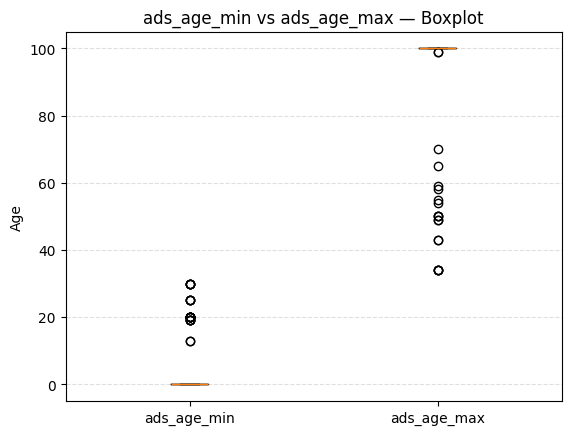

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 숫자형 보정
min_col = pd.to_numeric(ads_list["ads_age_min"], errors="coerce").dropna()
max_col = pd.to_numeric(ads_list["ads_age_max"], errors="coerce").dropna()

plt.figure()
plt.boxplot([min_col, max_col], showfliers=True)  # 이상치 표시
plt.xticks([1, 2], ["ads_age_min", "ads_age_max"])
plt.ylabel("Age")
plt.title("ads_age_min vs ads_age_max — Boxplot")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.show()

## 테이블 만들기

In [ ]:
ads_list_cln = ads_list.copy()

ads_list_cln = ads_list_cln.drop(columns=['ads_code', 'aff_idx', 'adv_idx',
       'ads_name', 'ads_icon_img', 'ads_summary', 'ads_save_way',
       'ads_day_cap', 'ads_sdate', 'ads_edate', 'ads_age_min', 'ads_age_max',
       'ads_contract_price',  'regdate'])

In [ ]:
ads_list_cln

,ads_idx,ads_type,ads_category,ads_os_type,ads_reward_price,ads_order,ads_rejoin_type,domain
0,6508,3,10,7,1100,2381500,NONE,금융
1,6985,3,7,7,2300,1201938,NONE,금융
2,8327,3,10,7,2420,1673458,NONE,미디어/컨텐츠
3,9264,3,10,7,8250,2372800,NONE,금융
4,9716,3,8,2,480,2699900,NONE,생활
...,...,...,...,...,...,...,...,...
9512,446899,3,4,7,12,1369916,ADS_CODE_DAILY_UPDATE,커머스
9513,446900,3,4,7,12,1369915,ADS_CODE_DAILY_UPDATE,식당/카페
9514,446902,3,8,7,150,2735900,NONE,미디어/컨텐츠
9515,446908,2,0,2,180,1682806,NONE,금융


In [ ]:
records = records.merge(ads_list_cln, on='ads_idx', how='left')

In [ ]:
records

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,...,regdate,ctit,conversion,ads_type,ads_category,ads_os_type,ads_reward_price,ads_order,ads_rejoin_type,domain
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,...,NaN,NaN,0,3,5,2,4500,2447700,NONE,게임
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,...,2025-07-26 02:19:21,57.0,1,1,2,2,120,2749100,NONE,게임
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,...,2025-08-12 18:19:21,82.0,1,1,0,2,120,2758100,NONE,생활
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,...,NaN,NaN,0,3,5,2,4500,2449700,NONE,게임
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,...,NaN,NaN,0,3,5,2,11700,2456300,NONE,게임
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,144350110,5400,3800,2025-08-16,23,2025-08-16 23:57:32,...,NaN,NaN,0,3,5,2,3800,2447400,NONE,게임
16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,144350110,3600,2700,2025-08-18,15,2025-08-18 15:16:57,...,NaN,NaN,0,3,5,2,2700,2454600,NONE,게임
16854862,fffffc10523f96c3a470ef1c9ad6b930cb5d27b5,444350,61242190,58,33306660,180,170,2025-08-20,1,2025-08-20 01:02:48,...,NaN,NaN,0,1,1,2,120,2763600,NONE,게임
16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,144350110,6000,4500,2025-08-15,12,2025-08-15 12:04:56,...,NaN,NaN,0,3,5,2,4500,2449700,NONE,게임


In [ ]:
records.columns

Index(['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id',
       'contract_price', 'media_price', 'click_day', 'click_time',
       'click_date', 'exp_day', 'network', 'user_ip', 'rwd_idx', 'ads_code',
       'advid', 'adv_cost', 'earn_cost', 'regdate', 'ctit', 'conversion',
       'ads_type', 'ads_category', 'ads_os_type', 'ads_reward_price',
       'ads_order', 'ads_rejoin_type', 'domain'],
      dtype='object')

In [ ]:
records_cln = records.copy()

records_cln = records_cln.drop(columns=['pub_sub_rel_id', 'ads_code', 'adv_cost', 'earn_cost', 'ads_reward_price'])
records_cln

,click_key,ads_idx,dvc_idx,mda_idx,contract_price,media_price,click_day,click_time,click_date,exp_day,...,advid,regdate,ctit,conversion,ads_type,ads_category,ads_os_type,ads_order,ads_rejoin_type,domain
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,...,NaN,NaN,NaN,0,3,5,2,2447700,NONE,게임
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,180,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,...,40ceb01c-9b60-4452-bacd-0e061fb18ab4,2025-07-26 02:19:21,57.0,1,1,2,2,2749100,NONE,게임
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,170,120,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,...,73793f44-a471-4351-ae1c-d09accaf223a,2025-08-12 18:19:21,82.0,1,1,0,2,2758100,NONE,생활
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,...,NaN,NaN,NaN,0,3,5,2,2449700,NONE,게임
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,...,NaN,NaN,NaN,0,3,5,2,2456300,NONE,게임
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,5400,3800,2025-08-16,23,2025-08-16 23:57:32,2025-09-15,...,NaN,NaN,NaN,0,3,5,2,2447400,NONE,게임
16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,3600,2700,2025-08-18,15,2025-08-18 15:16:57,2025-09-17,...,NaN,NaN,NaN,0,3,5,2,2454600,NONE,게임
16854862,fffffc10523f96c3a470ef1c9ad6b930cb5d27b5,444350,61242190,58,180,170,2025-08-20,1,2025-08-20 01:02:48,2025-09-19,...,NaN,NaN,NaN,0,1,1,2,2763600,NONE,게임
16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,6000,4500,2025-08-15,12,2025-08-15 12:04:56,2025-09-14,...,NaN,NaN,NaN,0,3,5,2,2449700,NONE,게임


In [ ]:
records_cln.to_csv("유저테이블.csv")

In [ ]:
records_cln.columns

Index(['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'contract_price',
       'media_price', 'click_day', 'click_time', 'click_date', 'exp_day',
       'network', 'user_ip', 'rwd_idx', 'advid', 'regdate', 'ctit',
       'conversion', 'ads_type', 'ads_category', 'ads_os_type', 'ads_order',
       'ads_rejoin_type', 'domain'],
      dtype='object')

In [ ]:
records_cln['ads_rejoin_type'].unique()

array(['NONE', 'ADS_CODE_DAILY_UPDATE', 'REJOINABLE'], dtype=object)

In [ ]:
# 재참여 가능 비율 보기
ads_list['ads_rejoin_type'].value_counts(normalize=True).round(3)


ads_rejoin_type
ADS_CODE_DAILY_UPDATE    0.609
NONE                     0.343
REJOINABLE               0.048
Name: proportion, dtype: float64

In [ ]:
ads_list['ads_os_type'].value_counts(normalize=True).round(3)

ads_os_type
7    0.945
2    0.043
1    0.012
3    0.001
Name: proportion, dtype: float64

In [ ]:
print(records_cln['domain'].value_counts(normalize=True).round(3))
print(ads_list['domain'].value_counts(normalize=True).round(3))

domain
게임         0.867
금융         0.054
커머스        0.016
기타         0.013
생활         0.011
식당/카페      0.009
미디어/컨텐츠    0.009
의료/건강      0.006
채용         0.006
운세         0.003
뷰티         0.002
비영리/공공     0.002
식음료        0.001
운동/스포츠     0.001
교육         0.000
Name: proportion, dtype: float64
domain
커머스        0.294
식당/카페      0.227
생활         0.115
의료/건강      0.091
뷰티         0.054
식음료        0.045
기타         0.045
게임         0.044
운동/스포츠     0.034
미디어/컨텐츠    0.021
금융         0.018
교육         0.005
운세         0.003
비영리/공공     0.003
채용         0.001
Name: proportion, dtype: float64


In [ ]:
game_list = ads_list[ads_list['domain']=='게임']
game_list = game_list.reset_index().rename(columns={"index": "row_id"})
game_list.to_csv("gamelist.csv")

In [ ]:
game_list

,row_id,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
0,8,10500,h48Sy7DML6,6,10,3,5,판타지타운,https://nextapps-nas.aws.appang.kr/icon/202103...,대작 SNG! 판타지 마을을 경영하세요.\n\n[참여 방법]\n1. 광고 참여 버튼...,...,2029-11-29 00:00:00,0,100,2,4000,3000,2414800,NONE,2021-03-19 18:44:44 UTC,게임
1,24,11059,2vK6pADbON,8,50,3,5,파이널삼국지2,https://static.adbrix.igaworks.com/adpopcorn/2...,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. APP 최초 내...,...,2027-01-01 00:00:00,0,100,2,300,200,2097400,NONE,2021-05-03 17:23:00 UTC,게임
2,25,11123,s6D62izbyb,17,552,9,6,프린세스테일,https://w.namu.la/s/8059e237bfd290461346d7bd94...,40여 종 공주들의 귀염뽀짝 방치형 판타지 RPG,...,2025-12-31 00:00:00,0,100,2,0,429,1429100,NONE,2021-05-10 10:11:59 UTC,게임
3,41,16485,bBqgAcVlKc,1,1403,9,6,브롤스타즈,https://play-lh.googleusercontent.com/EiElcSrd...,빠르게 진행되는 3v3 모바일 멀티플레이 배틀 로얄! 3분간 진행되는 다양한 게임 ...,...,2025-12-31 00:00:00,0,100,2,0,679,1773300,NONE,2022-04-12 18:55:53 UTC,게임
4,52,17234,8i0KRg8hF5,1,1125,9,0,IDLE ANGELS : 여신전쟁,https://i.imgur.com/8n2w9pM.png,마음 편하게 방치해도 당신은 이 세계를 구할 수 있다!\n자면서도 즐길 수 있는 방...,...,2025-12-31 00:00:00,0,100,2,0,571,1823000,NONE,2022-05-18 14:45:55 UTC,게임
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,9034,446088,B9pFfICL3N,71,910,3,5,네기마,https://cdnet.nasmob.com/nstation/image/202508...,"- 리워드 미지급시, 왼쪽 하단의 [파랑 모자 캐릭터] 클릭시 확인되는 ID를 문의...",...,2029-11-29 00:00:00,0,100,2,15000,11250,2470800,NONE,2025-08-21 13:58:08 UTC,게임
416,9051,446111,wbtGIkyiYA,84,1623,3,4,인형뽑기기계,https://adwize.co.kr/common_img/reward/GNSQ_IC...,[참여방법]\n- 미션 참여 방법을 꼭 확인하신 후 참여해 주세요.\n- 제공되는 ...,...,9999-12-31 23:59:59,0,100,7,15,10,1369936,NONE,2025-08-21 15:27:19 UTC,게임
417,9076,446139,1TbomruzNy,84,1623,3,4,출차주의등,https://adwize.co.kr/common_img/reward/GNSQ_IC...,[참여방법]\n- 미션 참여 방법을 꼭 확인하신 후 참여해 주세요.\n- 제공되는 ...,...,9999-12-31 23:59:59,0,100,7,15,10,1369936,NONE,2025-08-22 00:09:33 UTC,게임
418,9159,446268,8ebAq9yQDL,13,335,1,2,데몬 소서리스 키우기:방치형 RPG,https://seimg.pincrux.com/icon/1755824514.448_...,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. App 내려받기...,...,2029-11-29 00:00:00,0,100,2,130,90,2763200,NONE,2025-08-22 11:02:58 UTC,게임


In [ ]:
pip install rapidfuzz

python(8359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.7 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
result_df = map_ads_names_with_ios(game_list, name_col="ads_name")

In [ ]:
result_df

,row_id,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,...,ios_title,ios_seller,ios_primaryGenreName,ios_genres_raw,genre_u19,genre_u6,age_label_ios,age_min_ios,match_score,match_status
0,8,10500,h48Sy7DML6,6,10,3,5,판타지타운,https://nextapps-nas.aws.appang.kr/icon/202103...,대작 SNG! 판타지 마을을 경영하세요.\n\n[참여 방법]\n1. 광고 참여 버튼...,...,판타지타운,"Arumgames Co.,Ltd.",Games,"게임,가족,시뮬레이션",캐주얼,캐주얼/하이퍼캐주얼/아이들,4+,4.0,100.000000,matched
1,24,11059,2vK6pADbON,8,50,3,5,파이널삼국지2,https://static.adbrix.igaworks.com/adpopcorn/2...,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. APP 최초 내...,...,파이널삼국지2,"Gamepub CO., LTD",Games,"게임,엔터테인먼트,액션,롤플레잉",캐주얼,캐주얼/하이퍼캐주얼/아이들,12+,12.0,100.000000,matched
2,25,11123,s6D62izbyb,17,552,9,6,프린세스테일,https://w.namu.la/s/8059e237bfd290461346d7bd94...,40여 종 공주들의 귀염뽀짝 방치형 판타지 RPG,...,None,None,None,None,None,None,None,NaN,83.333333,no_match
3,41,16485,bBqgAcVlKc,1,1403,9,6,브롤스타즈,https://play-lh.googleusercontent.com/EiElcSrd...,빠르게 진행되는 3v3 모바일 멀티플레이 배틀 로얄! 3분간 진행되는 다양한 게임 ...,...,브롤스타즈,Supercell Oy,Games,"게임,캐주얼,엔터테인먼트,액션",캐주얼,캐주얼/하이퍼캐주얼/아이들,9+,9.0,100.000000,matched
4,52,17234,8i0KRg8hF5,1,1125,9,0,IDLE ANGELS : 여신전쟁,https://i.imgur.com/8n2w9pM.png,마음 편하게 방치해도 당신은 이 세계를 구할 수 있다!\n자면서도 즐길 수 있는 방...,...,None,None,None,None,None,None,None,NaN,28.571429,no_match
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,9034,446088,B9pFfICL3N,71,910,3,5,네기마,https://cdnet.nasmob.com/nstation/image/202508...,"- 리워드 미지급시, 왼쪽 하단의 [파랑 모자 캐릭터] 클릭시 확인되는 ID를 문의...",...,None,None,None,None,None,None,None,NaN,-1.000000,error:HTTPError
416,9051,446111,wbtGIkyiYA,84,1623,3,4,인형뽑기기계,https://adwize.co.kr/common_img/reward/GNSQ_IC...,[참여방법]\n- 미션 참여 방법을 꼭 확인하신 후 참여해 주세요.\n- 제공되는 ...,...,None,None,None,None,None,None,None,NaN,-1.000000,error:HTTPError
417,9076,446139,1TbomruzNy,84,1623,3,4,출차주의등,https://adwize.co.kr/common_img/reward/GNSQ_IC...,[참여방법]\n- 미션 참여 방법을 꼭 확인하신 후 참여해 주세요.\n- 제공되는 ...,...,None,None,None,None,None,None,None,NaN,-1.000000,error:HTTPError
418,9159,446268,8ebAq9yQDL,13,335,1,2,데몬 소서리스 키우기:방치형 RPG,https://seimg.pincrux.com/icon/1755824514.448_...,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. App 내려받기...,...,None,None,None,None,None,None,None,NaN,-1.000000,error:HTTPError


In [ ]:
import re, time, urllib.parse, requests, pandas as pd
from rapidfuzz import fuzz

APPLE_GENRE_TO_U19_KO = {"Action":"액션","Adventure":"어드벤처","Arcade":"아케이드","Board":"보드",
  "Card":"카드","Casino":"카지노","Casual":"캐주얼","Dice":"주사위","Educational":"교육","Family":"가족",
  "Music":"음악","Puzzle":"퍼즐","Racing":"레이싱","Role Playing":"RPG","Simulation":"시뮬레이션",
  "Sports":"스포츠","Strategy":"전략","Trivia":"퀴즈","Word":"단어"}

U19_TO_U6_KO = {
  "RPG":"RPG/어드벤처","어드벤처":"RPG/어드벤처",
  "액션":"액션/아케이드/슈팅","아케이드":"액션/아케이드/슈팅",
  "전략":"전략/시뮬레이션","시뮬레이션":"전략/시뮬레이션",
  "스포츠":"스포츠/레이싱","레이싱":"스포츠/레이싱",
  "퍼즐":"퍼즐/보드/카드/카지노/퀴즈/단어","보드":"퍼즐/보드/카드/카지노/퀴즈/단어","카드":"퍼즐/보드/카드/카지노/퀴즈/단어",
  "카지노":"퍼즐/보드/카드/카지노/퀴즈/단어","퀴즈":"퍼즐/보드/카드/카지노/퀴즈/단어","단어":"퍼즐/보드/카드/카지노/퀴즈/단어",
  "캐주얼":"캐주얼/하이퍼캐주얼/아이들","주사위":"캐주얼/하이퍼캐주얼/아이들","교육":"캐주얼/하이퍼캐주얼/아이들",
  "가족":"캐주얼/하이퍼캐주얼/아이들","음악":"캐주얼/하이퍼캐주얼/아이들"
}

def _norm(s:str)->str:
    s = (s or "").lower()
    s = re.sub(r'[\(\[\{].*?[\)\]\}]','',s)    # 괄호부
    s = re.sub(r'[:\-–|].*$','',s)             # 부제목
    s = re.sub(r'\s+',' ',s).strip()
    return s

def _age_to_int(label:str):
    if not label: return None
    m = re.search(r'(\d+)\+?', label)
    return int(m.group(1)) if m else None

def ios_search(name, country="kr", limit=5):
    q = urllib.parse.quote(name)
    url = f"https://itunes.apple.com/search?country={country}&media=software&entity=software&limit={limit}&term={q}"
    return requests.get(url, timeout=10).json().get("results", [])

def _best_ios(app_name, cands):
    t = _norm(app_name)
    best = (0, None)
    for c in cands:
        title = _norm(c.get("trackName",""))
        score = max(fuzz.token_set_ratio(t, title), fuzz.partial_ratio(t, title))
        if "Games" in (c.get("genres") or []): score += 2
        if score > best[0]: best = (score, c)
    return best

def parse_ios_meta(c):
    genres = c.get("genres") or []
    u19 = None
    for g in genres:
        if g in APPLE_GENRE_TO_U19_KO:
            u19 = APPLE_GENRE_TO_U19_KO[g]; break
    if not u19:
        pg = c.get("primaryGenreName")
        if pg in APPLE_GENRE_TO_U19_KO: u19 = APPLE_GENRE_TO_U19_KO[pg]
    u19 = u19 or "캐주얼"
    return {
        "ios_trackId": c.get("trackId"),
        "ios_bundleId": c.get("bundleId"),
        "ios_title": c.get("trackName"),
        "ios_seller": c.get("sellerName"),
        "genre_u19": u19,
        "genre_u6": U19_TO_U6_KO.get(u19, "캐주얼/하이퍼캐주얼/아이들"),
        "age_label_ios": c.get("contentAdvisoryRating"),
        "age_min_ios": _age_to_int(c.get("contentAdvisoryRating"))
    }

def map_with_ios(df, name_col="ads_name", thr=85, sleep=0.2):
    rows=[]
    for name in df[name_col].astype(str):
        try:
            cands = ios_search(name)
            score, c = _best_ios(name, cands)
            if c and score>=thr:
                meta = parse_ios_meta(c); meta["match_score"]=score; meta["match_src"]="ios"
            else:
                meta = {"genre_u19":None,"genre_u6":None,"age_label_ios":None,"age_min_ios":None,
                        "ios_trackId":None,"ios_bundleId":None,"ios_title":None,"ios_seller":None,
                        "match_score":score,"match_src":"none"}
        except Exception as e:
            meta = {"genre_u19":None,"genre_u6":None,"age_label_ios":None,"age_min_ios":None,
                    "ios_trackId":None,"ios_bundleId":None,"ios_title":None,"ios_seller":None,
                    "match_score":-1,"match_src":f"error:{type(e).__name__}"}
        rows.append(meta); 
        if sleep: time.sleep(sleep)
    return pd.concat([df.reset_index(drop=True), pd.DataFrame(rows)], axis=1)


## 게임 장르 

In [ ]:
game_top = game_list.head(50)
game_top

,row_id,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
0,8,10500,h48Sy7DML6,6,10,3,5,판타지타운,https://nextapps-nas.aws.appang.kr/icon/202103...,대작 SNG! 판타지 마을을 경영하세요.\n\n[참여 방법]\n1. 광고 참여 버튼...,...,2029-11-29 00:00:00,0,100,2,4000,3000,2414800,NONE,2021-03-19 18:44:44 UTC,게임
1,24,11059,2vK6pADbON,8,50,3,5,파이널삼국지2,https://static.adbrix.igaworks.com/adpopcorn/2...,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. APP 최초 내...,...,2027-01-01 00:00:00,0,100,2,300,200,2097400,NONE,2021-05-03 17:23:00 UTC,게임
2,25,11123,s6D62izbyb,17,552,9,6,프린세스테일,https://w.namu.la/s/8059e237bfd290461346d7bd94...,40여 종 공주들의 귀염뽀짝 방치형 판타지 RPG,...,2025-12-31 00:00:00,0,100,2,0,429,1429100,NONE,2021-05-10 10:11:59 UTC,게임
3,41,16485,bBqgAcVlKc,1,1403,9,6,브롤스타즈,https://play-lh.googleusercontent.com/EiElcSrd...,빠르게 진행되는 3v3 모바일 멀티플레이 배틀 로얄! 3분간 진행되는 다양한 게임 ...,...,2025-12-31 00:00:00,0,100,2,0,679,1773300,NONE,2022-04-12 18:55:53 UTC,게임
4,52,17234,8i0KRg8hF5,1,1125,9,0,IDLE ANGELS : 여신전쟁,https://i.imgur.com/8n2w9pM.png,마음 편하게 방치해도 당신은 이 세계를 구할 수 있다!\n자면서도 즐길 수 있는 방...,...,2025-12-31 00:00:00,0,100,2,0,571,1823000,NONE,2022-05-18 14:45:55 UTC,게임
5,53,17245,iLdbfmutPk,1,1125,9,0,전국구 : 권력의 법칙,https://i.imgur.com/nsJPY82.png,조직의 보스가 되어 전국구를 통일하라! 도시를 점령하고 나만의 도시로 발전시켜라!\...,...,2025-12-31 00:00:00,0,100,2,0,250,1823800,NONE,2022-05-18 17:04:49 UTC,게임
6,56,17978,mOEp8lhywC,8,50,3,8,아이템매니아,https://static.adbrix.igaworks.com/adpopcorn/2...,이벤트 페이지의 \'아이템매니아 회원가입 \'하면 리워드 지급!\n(신규 가입한 유...,...,2030-12-01 00:00:00,0,100,7,900,720,2484300,NONE,2022-06-21 15:48:22 UTC,게임
7,63,19247,BkabOPfFoi,1,724,9,0,천하제일검,https://i.imgur.com/V1KdJhX.jpg,"1. 「천하제일검」 천하제일 신장 시스템!\n화염, 얼음, 독, 전기 네 가지 속성...",...,2025-12-31 00:00:00,0,100,2,0,507,1945800,NONE,2022-09-06 18:09:21 UTC,게임
8,65,19853,As5AAlGjum,15,1205,9,6,계급장 키우기,https://i.imgur.com/J85NHFS.png,"이등병에서 원수 계급장까지!\n계급장을 키우고 훈련해서 적 탱크, 전함, 전투기를 ...",...,2025-12-31 00:00:00,0,100,2,0,678,1966400,NONE,2022-10-13 18:55:50 UTC,게임
9,66,19953,za5edBppf2,1,839,9,0,조선좀비전 : 방치형 RPG,https://i.imgur.com/0iKc15E.png,"피로 물든 시대, 체탐자를 수련하여 영웅이 되어라!\n\n<금년 봄에 기근이 너무 ...",...,2025-12-31 00:00:00,0,100,2,0,500,1968900,NONE,2022-10-20 15:08:45 UTC,게임


In [ ]:
mask = records_cln['ads_idx'].isin(game_top['ads_idx'])
records_top = records_cln[mask]


In [ ]:
records_top

,click_key,ads_idx,dvc_idx,mda_idx,contract_price,media_price,click_day,click_time,click_date,exp_day,...,advid,regdate,ctit,conversion,ads_type,ads_category,ads_os_type,ads_order,ads_rejoin_type,domain
9961,0026c4cfde9fb0e6de80d007533164babf133f35,23540,61764567,337,1359,1000,2025-08-03,1,2025-08-03 01:30:27,2025-09-02,...,NaN,NaN,NaN,0,3,5,2,2134300,NONE,게임
18432,0047d19616e720368fcb7340941c01d44c69ca19,26001,61530625,270,0,399,2025-07-31,16,2025-07-31 16:35:53,2025-08-30,...,e52d8c0b-e396-470a-ae9a-1cfb3f428725,2025-08-01 11:26:29,67836.0,1,9,6,2,2161600,NONE,게임
19347,004b7d6515359cb1de9d042f9e17751b58d6406c,27844,61710928,270,0,294,2025-08-14,21,2025-08-14 21:34:35,2025-09-13,...,NaN,NaN,NaN,0,9,6,2,2193700,NONE,게임
20458,004fd3ec510a2dc1723652ca081f069b321b2f02,20583,61892206,270,0,499,2025-08-15,23,2025-08-15 23:53:07,2025-09-14,...,NaN,NaN,NaN,0,9,6,2,1995900,NONE,게임
25064,0061e56007fb694358d498646a5b0198dfbd5ee0,26001,39144084,270,0,399,2025-08-14,14,2025-08-14 14:42:03,2025-09-13,...,NaN,NaN,NaN,0,9,6,2,2161600,NONE,게임
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16846593,ffe01964b15c7ed57955f1e0daa6285aeaa4ac6f,28025,61747080,539,3500,2625,2025-08-11,13,2025-08-11 13:44:35,2025-09-10,...,NaN,NaN,NaN,0,3,8,2,1668056,NONE,게임
16847580,ffe3ab957ccf9268c4b250c45fa9ee45e5646537,11059,61031618,761,300,200,2025-08-15,0,2025-08-15 00:24:12,2025-09-14,...,NaN,NaN,NaN,0,3,5,2,2097400,NONE,게임
16848257,ffe680660b6418235ef0b206df01c8dd770190d8,28025,61829468,539,3500,2625,2025-08-10,16,2025-08-10 16:45:54,2025-09-09,...,NaN,NaN,NaN,0,3,8,2,1668056,NONE,게임
16849324,ffeab12ba1af1800d4da1892a9025f570bf2b43b,24944,61747080,583,1890,1400,2025-08-13,0,2025-08-13 00:01:37,2025-09-12,...,NaN,NaN,NaN,0,3,5,2,2224400,NONE,게임


In [ ]:
records_top['click_date'] = pd.to_datetime(records_top['click_date'])

In [ ]:
records_top.columns

Index(['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'contract_price',
       'media_price', 'click_day', 'click_time', 'click_date', 'exp_day',
       'network', 'user_ip', 'rwd_idx', 'advid', 'regdate', 'ctit',
       'conversion', 'ads_type', 'ads_category', 'ads_os_type', 'ads_order',
       'ads_rejoin_type', 'domain'],
      dtype='object')

In [ ]:
records_top['click_date']

9961       2025-08-03 01:30:27
18432      2025-07-31 16:35:53
19347      2025-08-14 21:34:35
20458      2025-08-15 23:53:07
25064      2025-08-14 14:42:03
                   ...        
16846593   2025-08-11 13:44:35
16847580   2025-08-15 00:24:12
16848257   2025-08-10 16:45:54
16849324   2025-08-13 00:01:37
16852212   2025-08-04 19:02:31
Name: click_date, Length: 5274, dtype: datetime64[ns]

In [ ]:
import pandas as pd


# (2) groupby 요약
grp = records_top.groupby(['user_ip', 'dvc_idx'], dropna=False)
summary = grp.agg(
    clicks      = ('click_key', 'count'),
    conv        = ('conversion', 'sum'),
    conv_rate   = ('conversion', lambda x: x.mean() if len(x) else 0),
    uniq_ads    = ('ads_idx', 'unique'),
    uniq_media  = ('mda_idx', 'unique'),
    first_click = ('click_time', 'min'),
    last_click  = ('click_time', 'max')
).reset_index()

# (3) 많이 발생한 그룹 상위 20개
summary_top20 = summary.sort_values(['clicks','conv'], ascending=[False, False]).head(20)
summary_top20


,user_ip,dvc_idx,clicks,conv,conv_rate,uniq_ads,uniq_media,first_click,last_click
1398,52.79.72.135,61747080,1798,0,0.000000,"[28025, 24944]","[539, 583]",1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000023
504,119.18.118.177,38731108,96,1,0.010417,"[27844, 27576, 20993]",[270],1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000023
1444,58.78.114.61,50730243,52,0,0.000000,"[27576, 27611, 27374, 26763, 26001, 27844, 25890]",[270],1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000023
1453,59.10.188.214,61747080,49,0,0.000000,"[24944, 28025]","[583, 539]",1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000000023
414,118.235.74.18,39739854,44,3,0.068182,"[20195, 19853, 20168, 20062, 20328, 19953, 19247]",[270],1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000023
521,119.206.48.142,43156412,42,13,0.309524,"[22106, 20705, 20785, 19247, 20801, 22081, 219...",[270],1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000023
611,122.43.213.101,57854463,39,4,0.102564,"[17234, 22448, 19953, 27611, 27612]",[270],1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000022
1467,59.29.58.184,60978722,31,2,0.064516,"[27612, 22265, 17245, 27576, 27633, 20583]",[270],1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000023
730,175.196.255.163,52845580,27,0,0.000000,"[26763, 21750, 27844, 27374, 20993, 26022, 200...",[270],1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000023
386,118.235.4.99,39739854,25,4,0.160000,"[21903, 20737, 20785, 20726, 20801, 21319, 20993]",[270],1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000023


### User_43156412

In [ ]:
lst = summary_top20.loc[summary_top20['dvc_idx'].eq(43156412), 'uniq_ads'].iat[0]
print(lst)        # 혹은 그냥 lst


[22106 20705 20785 19247 20801 22081 21979 22265 17234 20737 20993 27611
 22557 19853 22448 26022 20328]


In [ ]:
user_43156412 = records_cln[records_cln['dvc_idx']==43156412]
user_43156412

,click_key,ads_idx,dvc_idx,mda_idx,contract_price,media_price,click_day,click_time,click_date,exp_day,...,advid,regdate,ctit,conversion,ads_type,ads_category,ads_os_type,ads_order,ads_rejoin_type,domain
90434,01612cab5a94127454305d13ddea35d526884200,31758,43156412,270,0,294,2025-08-15,16,2025-08-15 16:44:31,2025-09-14,...,NaN,NaN,NaN,0,9,6,2,2226800,NONE,게임
114068,01bc53d53cd129f9586e631e0223822bd9b72b16,22106,43156412,270,0,300,2025-08-05,16,2025-08-05 16:46:00,2025-09-04,...,NaN,NaN,NaN,0,9,0,2,2083900,NONE,게임
142334,022a0fe42df27b6591ab89d7dfae1c1d0b661727,20705,43156412,270,0,105,2025-08-13,10,2025-08-13 10:44:16,2025-09-12,...,NaN,NaN,NaN,0,9,6,2,2004300,NONE,게임
194857,02f6cbbb2f72258df10e6876b3a304508b4b5b5e,22106,43156412,270,0,300,2025-08-14,20,2025-08-14 20:30:31,2025-09-13,...,NaN,NaN,NaN,0,9,0,2,2083900,NONE,게임
778819,0bd0cd13db3210d17828f86203d7b2d7d1452abb,168902,43156412,270,0,375,2025-07-29,3,2025-07-29 03:06:35,2025-08-28,...,NaN,NaN,NaN,0,9,6,2,2472600,NONE,게임
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155187,f5640a98c70ebb86cc20b37c5a467d5a3a764ea3,389085,43156412,270,0,205,2025-08-07,6,2025-08-07 06:58:32,2025-09-06,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-08-07 15:03:08,29076.0,1,9,6,2,2592500,NONE,게임
16226728,f6785543c10f12db375474ab8c862450ffabe290,93247,43156412,270,0,300,2025-08-09,14,2025-08-09 14:14:56,2025-09-08,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-08-11 13:46:37,171101.0,1,9,6,2,2347700,NONE,게임
16382404,f8d3e819338dad1c1fd3122e7270bdb73725ebcf,22557,43156412,270,0,249,2025-08-04,9,2025-08-04 09:47:15,2025-09-03,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-08-04 11:57:43,7828.0,1,9,6,2,2092900,NONE,게임
16606863,fc3a3f4c7cd4a0d73613820dc79414db48a9920b,444026,43156412,270,0,1050,2025-08-14,12,2025-08-14 12:54:40,2025-09-13,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-08-14 19:16:29,22909.0,1,9,6,2,2759900,NONE,게임


In [ ]:
user_43156412[user_43156412['conversion']==1]

,click_key,ads_idx,dvc_idx,mda_idx,contract_price,media_price,click_day,click_time,click_date,exp_day,...,advid,regdate,ctit,conversion,ads_type,ads_category,ads_os_type,ads_order,ads_rejoin_type,domain
833512,0ca47d6fdea00cb3d51a054bd15ea28360d057bb,20785,43156412,270,0,130,2025-08-06,13,2025-08-06 13:01:04,2025-09-05,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-08-06 16:21:36,12032.0,1,9,0,2,2013900,NONE,게임
2530888,26705577572c245d98bb755e8c5691774fe97405,136445,43156412,270,0,300,2025-08-02,3,2025-08-02 03:31:35,2025-09-01,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-08-04 11:57:46,203171.0,1,9,6,2,2428600,NONE,게임
2940286,2ca7dbfe22175a037e075a4947271573380e9c85,254820,43156412,270,0,324,2025-08-01,16,2025-08-01 16:25:52,2025-08-31,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-08-01 17:42:17,4585.0,1,9,6,2,2487400,NONE,게임
3345254,32d4f22742ee10575a9b93e3200902139af778eb,168902,43156412,270,0,375,2025-07-29,12,2025-07-29 12:16:34,2025-08-28,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-07-29 14:56:41,9607.0,1,9,6,2,2472600,NONE,게임
3784615,3981386b858aae8981c8fa891eec2e55f16fe6c1,21386,43156412,270,0,280,2025-08-02,6,2025-08-02 06:19:38,2025-09-01,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-08-04 09:03:00,182602.0,1,9,6,2,2059600,NONE,식당/카페
4032131,3d44d1a81a170c126266c529c22f136f85bbffe0,22265,43156412,270,0,230,2025-08-03,22,2025-08-03 22:31:59,2025-09-02,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-08-04 11:57:40,48341.0,1,9,6,2,2086400,NONE,게임
4060841,3db4d6c481bc8660d6ffa45ec2388b51a56a909c,140001,43156412,270,0,300,2025-07-31,5,2025-07-31 05:50:30,2025-08-30,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-07-31 13:13:16,26566.0,1,9,6,2,2430800,NONE,게임
4899644,4a769c233963e82e91f433a51c9b30ce8e8c2828,30504,43156412,270,0,175,2025-08-08,15,2025-08-08 15:02:17,2025-09-07,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-08-11 13:46:24,254647.0,1,9,0,2,2223700,NONE,게임
5829405,5897bc54716168934d95cef65d13645b11815105,17234,43156412,270,0,399,2025-08-05,16,2025-08-05 16:47:26,2025-09-04,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-08-06 10:48:52,64886.0,1,9,0,2,1823000,NONE,게임
6678436,658205748ab6d2a388f33cc002d0af1668786803,27611,43156412,270,0,149,2025-07-29,1,2025-07-29 01:47:23,2025-08-28,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-07-29 11:48:10,36047.0,1,9,6,3,2177100,NONE,게임


In [ ]:
print("===user_43156412===\n")
print("매체사인덱스:", user_43156412['mda_idx'].unique())
print("도메인: ", user_43156412['domain'].unique())
print("전환수: ", user_43156412['conversion'].sum())
print("전환율: ", ((user_43156412['conversion'].sum()/len(user_43156412))*100).round(1))
print("특징: 매체사 270에서만 참여, ads_type 9만, 대부분 게임(특히 rpg가 많았음)")

===user_43156412===

매체사인덱스: [270]
도메인:  ['게임' '식당/카페' '미디어/컨텐츠']
전환수:  30
전환율:  30.3
특징: 매체사 270에서만 참여, ads_type 9만, 대부분 게임(특히 rpg가 많았음)


In [ ]:
records_cln[records_cln['user_ip']=='119.206.48.142']

,click_key,ads_idx,dvc_idx,mda_idx,contract_price,media_price,click_day,click_time,click_date,exp_day,...,advid,regdate,ctit,conversion,ads_type,ads_category,ads_os_type,ads_order,ads_rejoin_type,domain
90434,01612cab5a94127454305d13ddea35d526884200,31758,43156412,270,0,294,2025-08-15,16,2025-08-15 16:44:31,2025-09-14,...,NaN,NaN,NaN,0,9,6,2,2226800,NONE,게임
114068,01bc53d53cd129f9586e631e0223822bd9b72b16,22106,43156412,270,0,300,2025-08-05,16,2025-08-05 16:46:00,2025-09-04,...,NaN,NaN,NaN,0,9,0,2,2083900,NONE,게임
142334,022a0fe42df27b6591ab89d7dfae1c1d0b661727,20705,43156412,270,0,105,2025-08-13,10,2025-08-13 10:44:16,2025-09-12,...,NaN,NaN,NaN,0,9,6,2,2004300,NONE,게임
194857,02f6cbbb2f72258df10e6876b3a304508b4b5b5e,22106,43156412,270,0,300,2025-08-14,20,2025-08-14 20:30:31,2025-09-13,...,NaN,NaN,NaN,0,9,0,2,2083900,NONE,게임
778819,0bd0cd13db3210d17828f86203d7b2d7d1452abb,168902,43156412,270,0,375,2025-07-29,3,2025-07-29 03:06:35,2025-08-28,...,NaN,NaN,NaN,0,9,6,2,2472600,NONE,게임
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155187,f5640a98c70ebb86cc20b37c5a467d5a3a764ea3,389085,43156412,270,0,205,2025-08-07,6,2025-08-07 06:58:32,2025-09-06,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-08-07 15:03:08,29076.0,1,9,6,2,2592500,NONE,게임
16226728,f6785543c10f12db375474ab8c862450ffabe290,93247,43156412,270,0,300,2025-08-09,14,2025-08-09 14:14:56,2025-09-08,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-08-11 13:46:37,171101.0,1,9,6,2,2347700,NONE,게임
16382404,f8d3e819338dad1c1fd3122e7270bdb73725ebcf,22557,43156412,270,0,249,2025-08-04,9,2025-08-04 09:47:15,2025-09-03,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-08-04 11:57:43,7828.0,1,9,6,2,2092900,NONE,게임
16606863,fc3a3f4c7cd4a0d73613820dc79414db48a9920b,444026,43156412,270,0,1050,2025-08-14,12,2025-08-14 12:54:40,2025-09-13,...,c906311c-e62c-4eb7-ab78-4d9c7ede8ae3,2025-08-14 19:16:29,22909.0,1,9,6,2,2759900,NONE,게임


### User_57854463	

In [ ]:
user_57844463 = records_cln[records_cln['dvc_idx']==57854463]

In [ ]:
user_57844463[user_57844463['conversion']==1]

,click_key,ads_idx,dvc_idx,mda_idx,contract_price,media_price,click_day,click_time,click_date,exp_day,...,advid,regdate,ctit,conversion,ads_type,ads_category,ads_os_type,ads_order,ads_rejoin_type,domain
213326,033dd95b267ca2cb147b7d383f82894edb6c0a0d,356956,57854463,270,5,3,2025-08-08,4,2025-08-08 04:30:23,2025-09-07,...,dd41e3d3-1f19-41ff-9c60-ec1fedf69f38,2025-08-08 04:30:29,6.0,1,3,13,7,2734500,ADS_CODE_DAILY_UPDATE,커머스
275386,042fd0901f85ce424ce58976d6f6259633205d80,356956,57854463,270,5,3,2025-08-06,9,2025-08-06 09:02:24,2025-09-05,...,dd41e3d3-1f19-41ff-9c60-ec1fedf69f38,2025-08-06 09:02:29,5.0,1,3,13,7,2734500,ADS_CODE_DAILY_UPDATE,커머스
704113,0ab0f1a24226a850c90c0f18eb2f4a93b336a6c0,435921,57854463,270,0,200,2025-07-26,21,2025-07-26 21:36:54,2025-08-25,...,dd41e3d3-1f19-41ff-9c60-ec1fedf69f38,2025-07-28 15:08:56,149522.0,1,9,6,2,2735400,NONE,게임
3040898,2e314d213eec97dc78461176a61a66523b5d1e67,356956,57854463,270,5,3,2025-07-30,9,2025-07-30 09:38:39,2025-08-29,...,dd41e3d3-1f19-41ff-9c60-ec1fedf69f38,2025-07-30 09:38:48,9.0,1,3,13,7,2734500,ADS_CODE_DAILY_UPDATE,커머스
3292358,32064b3f3dadef4daa985b2ce1c87d27607a77d1,19953,57854463,270,0,350,2025-08-11,6,2025-08-11 06:25:51,2025-09-10,...,dd41e3d3-1f19-41ff-9c60-ec1fedf69f38,2025-08-11 12:58:15,23544.0,1,9,0,2,1968900,NONE,게임
3589333,3689f0391e03b92538979e5b58006f022d4a65d8,446048,57854463,270,170,84,2025-08-23,6,2025-08-23 06:20:29,2025-09-22,...,dd41e3d3-1f19-41ff-9c60-ec1fedf69f38,2025-08-23 06:20:51,22.0,1,1,0,2,2762700,NONE,게임
4096200,3e3e5a430245a1467e98746588979a92a3ad3d2b,70424,57854463,270,0,74,2025-08-05,5,2025-08-05 05:51:58,2025-09-04,...,dd41e3d3-1f19-41ff-9c60-ec1fedf69f38,2025-08-05 10:00:46,14928.0,1,9,6,2,2297600,NONE,게임
4352567,42217afad7cf37c5984a86ed188f59b1ecbca924,429019,57854463,270,0,200,2025-07-31,6,2025-07-31 06:01:03,2025-08-30,...,dd41e3d3-1f19-41ff-9c60-ec1fedf69f38,2025-07-31 09:13:56,11573.0,1,9,6,7,2730000,NONE,게임
5116222,4dc2104f7cd2e6efa4d1878023dd67e729907b21,435826,57854463,270,190,84,2025-07-29,8,2025-07-29 08:23:15,2025-08-28,...,dd41e3d3-1f19-41ff-9c60-ec1fedf69f38,2025-07-29 08:24:02,47.0,1,1,2,3,2752700,NONE,게임
5412817,52434113498c865c41b4274d8332d323850832b6,356956,57854463,270,5,3,2025-08-13,6,2025-08-13 06:41:30,2025-09-12,...,dd41e3d3-1f19-41ff-9c60-ec1fedf69f38,2025-08-13 06:41:38,8.0,1,3,13,7,2734500,ADS_CODE_DAILY_UPDATE,커머스


In [ ]:
mask = ads_domain['ads_idx'].isin(user_57844463['ads_idx'])
ads_list_57844463 = ads_domain[mask]

In [ ]:
ads_list_57844463

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
52,17234,8i0KRg8hF5,1,1125,9,0,IDLE ANGELS : 여신전쟁,https://i.imgur.com/8n2w9pM.png,마음 편하게 방치해도 당신은 이 세계를 구할 수 있다!\n자면서도 즐길 수 있는 방...,모든 서브퀘스트 완료,...,2025-12-31 00:00:00,0,100,2,0,571,1823000,NONE,2022-05-18 14:45:55 UTC,게임\n
66,19953,za5edBppf2,1,839,9,0,조선좀비전 : 방치형 RPG,https://i.imgur.com/0iKc15E.png,"피로 물든 시대, 체탐자를 수련하여 영웅이 되어라!\n\n<금년 봄에 기근이 너무 ...",모든 서브퀘스트 완료,...,2025-12-31 00:00:00,0,100,2,0,500,1968900,NONE,2022-10-20 15:08:45 UTC,게임\n
138,22448,v8CggHbU8Y,1,703,9,0,다크에덴M with SIA,https://i.imgur.com/j5wOMXw.png,끝없는 전투의 세계에서 자신을 증명하라!\n\n▣ 최고의 한방을 노려라!\n - 적...,모든 서브퀘스트 완료,...,2025-12-31 00:00:00,0,100,2,0,464,2086500,NONE,2023-06-20 11:35:02 UTC,게임\n
161,27611,FsJS5gRddB,1,614,9,6,영웅삼국,https://i.imgur.com/utj8TUx.png,"영웅의, 영웅에 의한, 영웅을 위한 [영웅삼국]\n\n영웅의, 영웅에 의한, 영웅을...",모든 서브퀘스트 완료,...,2025-12-31 00:00:00,0,100,3,0,214,2177100,NONE,2023-12-24 19:28:16 UTC,게임\n
162,27612,MYDlIVNByw,1,614,9,6,귀환병 전기 : 레트로RPG,https://i.imgur.com/FOUESiL.png,"10년 마계원정을 마치고 돌아왔더니 120년이 흘렀다!\n간신히 생존해 돌아왔는데,...",모든 서브퀘스트 완료,...,2025-12-31 00:00:00,0,100,3,0,214,2181700,NONE,2023-12-24 19:47:09 UTC,게임\n
188,28449,gURN1Im2qY,48,1455,9,6,이매소녀,https://i.imgur.com/3eVK4BX.png,[쿠폰 입력 방법]\n\n(1) 이매소녀 쿠폰 등록 페이지 링크로 이동하셔서 쿠폰 ...,모든 서브퀘스트 완료,...,2025-12-31 00:00:00,0,100,2,0,307,2198900,NONE,2024-02-06 15:30:55 UTC,게임\n
196,29044,LN8LVgaCme,1,1287,9,6,닌자 소녀 키우기,https://i.imgur.com/6vz0I8R.png,"폭발적인 스피드, 그림자처럼 민첩한 닌자 소녀의 복수의 여정에 떠납니다!\n\n[닌...",모든 서브퀘스트 완료,...,2025-12-31 00:00:00,0,100,2,0,214,2200800,NONE,2024-02-28 19:02:26 UTC,게임\n
199,29622,x1B4vHuJjC,1,1257,9,0,오 마이 앤,https://i.imgur.com/qiIu1tF.jpeg,"■초록 지붕 집 속에서 펼쳐지는 따뜻한 힐링 스토리, Oh my Anne■\n마릴라...",모든 서브퀘스트 완료,...,2025-12-31 00:00:00,0,100,2,0,321,2212600,NONE,2024-03-20 17:18:29 UTC,게임\n
202,30504,gX7VMuiLfq,1,1406,9,0,Sky Age,https://i.imgur.com/5iJu3gu.png,"[스카이 에이지]는 빠른 속도의 던전 크롤링, 캐릭터 커스터마이징 요소, 다양한 캐...",모든 서브퀘스트 완료,...,2025-12-31 00:00:00,0,100,2,0,250,2223700,NONE,2024-04-02 14:53:22 UTC,게임\n
282,70424,BXKhMn7Itx,1,874,9,6,돌격 소녀 키우기,https://i.imgur.com/iT2fyx4.png,돌격 소녀 키우기는 재미있고 중독성 있는 방치형 RPG 게임입니다.\n다양한 콘텐츠...,모든 서브퀘스트 완료,...,2025-12-31 00:00:00,0,100,2,0,107,2297600,NONE,2024-07-15 14:45:25 UTC,게임\n


## 매체사 87번

In [102]:
mda_87 = records_cln[records_cln['mda_idx']==87]
mda_87

,click_key,ads_idx,dvc_idx,mda_idx,contract_price,media_price,click_day,click_time,click_date,exp_day,...,advid,regdate,ctit,conversion,ads_type,ads_category,ads_os_type,ads_order,ads_rejoin_type,domain
163,0000b175e3101383fe86daf3e583235b53806686,445046,35000873,87,180,150,2025-08-21,6,2025-08-21 06:53:42,2025-09-20,...,NaN,NaN,NaN,0,1,2,2,2763100,NONE,게임
499,00021bc7de28d6ea29a7487f8959d357bea03074,445046,45752424,87,180,150,2025-08-22,14,2025-08-22 14:23:08,2025-09-21,...,NaN,NaN,NaN,0,1,2,2,2763100,NONE,게임
595,00028414d4183fd3d120ac795b4b4d63e2fd16c6,445046,34190806,87,180,150,2025-08-21,7,2025-08-21 07:24:27,2025-09-20,...,NaN,NaN,NaN,0,1,2,2,2763100,NONE,게임
864,0003996305c8b4c8e0bde47f31ac2c4484866c9a,445046,33348936,87,180,150,2025-08-22,11,2025-08-22 11:57:38,2025-09-21,...,NaN,NaN,NaN,0,1,2,2,2763100,NONE,게임
881,0003a7b58af4c92035c4d4f7b632ca466d4fabb9,445046,27788374,87,180,150,2025-08-21,7,2025-08-21 07:29:34,2025-09-20,...,NaN,NaN,NaN,0,1,2,2,2763100,NONE,게임
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16852168,fff5b5a51c6533159d1125b3416e9d9b8747a367,445046,47314507,87,180,150,2025-08-21,2,2025-08-21 02:48:31,2025-09-20,...,NaN,NaN,NaN,0,1,2,2,2763100,NONE,게임
16852294,fff61639e1fb9d150763f3e460e99de5bc220f8d,445046,29574781,87,180,150,2025-08-21,6,2025-08-21 06:07:44,2025-09-20,...,NaN,NaN,NaN,0,1,2,2,2763100,NONE,게임
16852322,fff6394ecb3a8d99ec46e689038077724ddb7255,444350,43308013,87,180,150,2025-08-22,3,2025-08-22 03:19:35,2025-09-21,...,NaN,NaN,NaN,0,1,1,2,2763600,NONE,게임
16853546,fffac6ae97fde96ac3f7d1966d2cac75cba01f44,444350,62035490,87,180,150,2025-08-22,4,2025-08-22 04:16:39,2025-09-21,...,NaN,NaN,NaN,0,1,1,2,2763600,NONE,게임


In [114]:
mda_87[mda_87['conversion']==1]['ctit'].describe()

count    21173.000000
mean       253.070892
std        171.457330
min          5.000000
25%        128.000000
50%        232.000000
75%        289.000000
max       4565.000000
Name: ctit, dtype: float64

In [ ]:
mda_87[mda_87['conversion']==1]['ads_idx'].value_counts()

ads_idx
444350    12890
445046     8266
18504        11
22498         2
29699         2
21037         2
Name: count, dtype: int64

In [104]:
mda_87['ads_idx'].unique()

array([445046, 444350,  21037,  22498,  29699,  18504])

In [105]:
target_ads_idx = [445046, 444350, 21037, 22498, 29699, 18504]
ads_list[ads_list['ads_idx'].isin(target_ads_idx)]

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
59,18504,GPOUSbWnaX,30,866,5,3,정식품 페이스북,https://buzzvil.akamaized.net/adfit.image/uplo...,페이스북 페이지를 좋아요 하세요.\n\n[참여방법]\n- \'좋아요\' 를 완료하시...,좋아요,...,2025-08-20 00:00:00,0,100,7,257,180,2760500,NONE,2022-07-19 15:30:29 UTC,식음료
97,21037,9Bb06zz13Z,15,1276,3,8,바바더닷컴,https://i.imgur.com/fjU16lI.png,프리미엄 토탈케어 AI플랫폼 바바더닷컴에서 쇼핑 혜택 만나보세요\n\n[참여 방법]...,최초 회원가입,...,2025-09-01 00:00:00,0,100,2,1440,800,2722900,NONE,2023-02-27 15:32:20 UTC,커머스
139,22498,f7izkH0Mej,1,791,3,8,미툰 7일 무료체험,http://api.flexplatform.net/v1/get_ad_image.ph...,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 7일간 ...,7일간 무료체험 신청,...,2030-01-01 00:00:00,19,100,7,4500,3200,2718500,NONE,2023-06-26 14:10:39 UTC,미디어/컨텐츠
200,29699,GbKhK4PGGs,1,791,3,8,탑운세 7일 무료체험,https://i.imgur.com/1DnMhQ6.png,갑진년 대박터지는 운세 맛집 탑-운세!\n\n[참여 방법]\n1. 광고 참여 버튼 ...,무료체험 신청,...,2030-01-01 00:00:00,19,100,7,2800,2200,2702100,NONE,2024-03-22 10:55:20 UTC,운세
7720,444350,WX4BWfxRA8,1,1658,1,1,조조의 꿈,https://i.imgur.com/TYzuYah.jpeg,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. App 내려받기...,받기,...,2025-08-23 00:00:00,0,100,2,180,120,2763600,NONE,2025-08-14 15:33:36 UTC,게임
8243,445046,squ3n89SHT,1,555,1,2,K데몬헌터스,https://i.imgur.com/syCedQE.jpeg,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. App 내려받기...,받기,...,2025-08-24 00:00:00,0,100,2,180,120,2763100,NONE,2025-08-18 18:18:29 UTC,게임


In [ ]:
grp = mda_87.groupby(['user_ip', 'dvc_idx'], dropna=False)
summary = grp.agg(
    clicks      = ('click_key', 'count'),
    conv        = ('conversion', 'sum'),
    conv_rate   = ('conversion', lambda x: x.mean() if len(x) else 0),
    uniq_ads    = ('ads_idx', 'unique'),
    uniq_media  = ('mda_idx', 'unique'),
    first_click = ('click_time', 'min'),
    last_click  = ('click_time', 'max')
).reset_index()


summary_top = summary.sort_values(['clicks','conv'], ascending=[False, False])
summary_top


,user_ip,dvc_idx,clicks,conv,conv_rate,uniq_ads,uniq_media,first_click,last_click
31146,58.124.193.129,50820676,13,0,0.000000,[444350],[87],8,8
16185,183.106.59.25,57721556,7,0,0.000000,[444350],[87],2,2
20600,223.38.52.64,28216318,6,1,0.166667,"[445046, 444350]",[87],12,12
19461,221.143.7.130,21227239,5,2,0.400000,"[445046, 444350]",[87],5,6
8072,118.235.74.234,62012677,5,1,0.200000,"[444350, 445046]",[87],12,12
...,...,...,...,...,...,...,...,...,...
30965,39.7.59.199,25589533,1,0,0.000000,[444350],[87],10,10
30993,39.7.59.214,31049847,1,0,0.000000,[445046],[87],1,1
31109,39.7.59.80,25514997,1,0,0.000000,[444350],[87],5,5
31113,39.7.59.82,47564790,1,0,0.000000,[445046],[87],11,11


In [119]:
summary_top.describe()

,dvc_idx,clicks,conv,conv_rate,first_click,last_click
count,3.115000e+04,31150.000000,31150.000000,31150.000000,31150.000000,31150.000000
mean,4.229267e+07,2.065778,0.679711,0.322506,7.416693,7.419936
std,1.279762e+07,0.430775,0.528171,0.238655,4.762635,4.765070
min,2.471220e+05,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.131636e+07,2.000000,0.000000,0.000000,4.000000,4.000000
50%,3.815614e+07,2.000000,1.000000,0.500000,7.000000,7.000000
75%,5.765143e+07,2.000000,1.000000,0.500000,11.000000,11.000000
max,6.206928e+07,13.000000,2.000000,1.000000,22.000000,23.000000


=> 유저 50% 이상이 전환율 50프로 그리고 클릭 두 번 중 한 번 전환 그리고 대부분 게임 광고 리워드 프라이스 100원 => 다운받으면 전환 

In [120]:
mda_87.describe()

,ads_idx,dvc_idx,mda_idx,contract_price,media_price,click_time,rwd_idx,ctit,conversion,ads_type,ads_category,ads_os_type,ads_order
count,64349.000000,6.434900e+04,64349.0,64349.000000,64349.000000,64349.000000,2.117300e+04,21173.000000,64349.000000,64349.000000,64349.00000,64349.000000,6.434900e+04
mean,444308.199723,4.251144e+07,87.0,181.799158,151.244930,7.591043,2.395175e+08,253.070892,0.329034,1.002580,1.52108,2.003574,2.763313e+06
std,13035.550901,1.285696e+07,0.0,80.079270,56.596553,4.738647,1.140398e+05,171.457330,0.469866,0.088814,0.52507,0.133637,1.153572e+03
min,18504.000000,2.471220e+05,87.0,180.000000,150.000000,0.000000,2.385774e+08,5.000000,0.000000,1.000000,1.00000,2.000000,2.702100e+06
25%,444350.000000,3.142261e+07,87.0,180.000000,150.000000,4.000000,2.394384e+08,128.000000,0.000000,1.000000,1.00000,2.000000,2.763100e+06
50%,445046.000000,3.837331e+07,87.0,180.000000,150.000000,7.000000,2.395246e+08,232.000000,0.000000,1.000000,2.00000,2.000000,2.763100e+06
75%,445046.000000,5.782570e+07,87.0,180.000000,150.000000,11.000000,2.396118e+08,289.000000,1.000000,1.000000,2.00000,2.000000,2.763600e+06
max,445046.000000,6.206928e+07,87.0,4500.000000,3200.000000,23.000000,2.397581e+08,4565.000000,1.000000,5.000000,8.00000,7.000000,2.763600e+06


In [122]:
mda_87['click_day'].unique()

array(['2025-08-21', '2025-08-22', '2025-08-20', '2025-08-23',
       '2025-08-19', '2025-08-12', '2025-08-05', '2025-07-27',
       '2025-08-15', '2025-08-13', '2025-08-24', '2025-08-14',
       '2025-08-25', '2025-08-16', '2025-07-29', '2025-08-06',
       '2025-08-11', '2025-07-30', '2025-08-01', '2025-08-07'],
      dtype=object)

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# datetime 변환 (이미 했다면 스킵)
mda_87['click_date'] = pd.to_datetime(mda_87['click_date'])

# 시간대별 분석을 위한 컬럼 추가
mda_87['date'] = mda_87['click_date'].dt.date
mda_87['hour'] = mda_87['click_date'].dt.hour
mda_87['day_hour'] = mda_87['click_date'].dt.strftime('%Y-%m-%d %H:00')

/var/folders/6n/tjcbrygj54s39y61m4r7ymrr0000gq/T/ipykernel_7290/3657032042.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mda_87['click_date'] = pd.to_datetime(mda_87['click_date'])
/var/folders/6n/tjcbrygj54s39y61m4r7ymrr0000gq/T/ipykernel_7290/3657032042.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mda_87['date'] = mda_87['click_date'].dt.date
/var/folders/6n/tjcbrygj54s39y61m4r7ymrr0000gq/T/ipykernel_7290/3657032042.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [125]:
# ads_idx별 일별 집계
daily_stats = mda_87.groupby(['ads_idx', 'date']).agg({
    'click_key': 'count',  # 클릭수
    'conversion': 'sum'   # 전환수 (고유 디바이스 수)
}).rename(columns={'click_key': 'clicks', 'conversion': 'conversions'})

# 전환율 계산
daily_stats['conversion_rate'] = (daily_stats['conversions'] / daily_stats['clicks'] * 100).round(2)
daily_stats = daily_stats.reset_index()

# 시간대별 집계
hourly_stats = mda_87.groupby(['ads_idx', 'hour']).agg({
    'click_key': 'count',
    'conversion': 'sum'
}).rename(columns={'click_key': 'clicks', 'conversion': 'conversions'})

hourly_stats['conversion_rate'] = (hourly_stats['conversions'] / hourly_stats['clicks'] * 100).round(2)
hourly_stats = hourly_stats.reset_index()

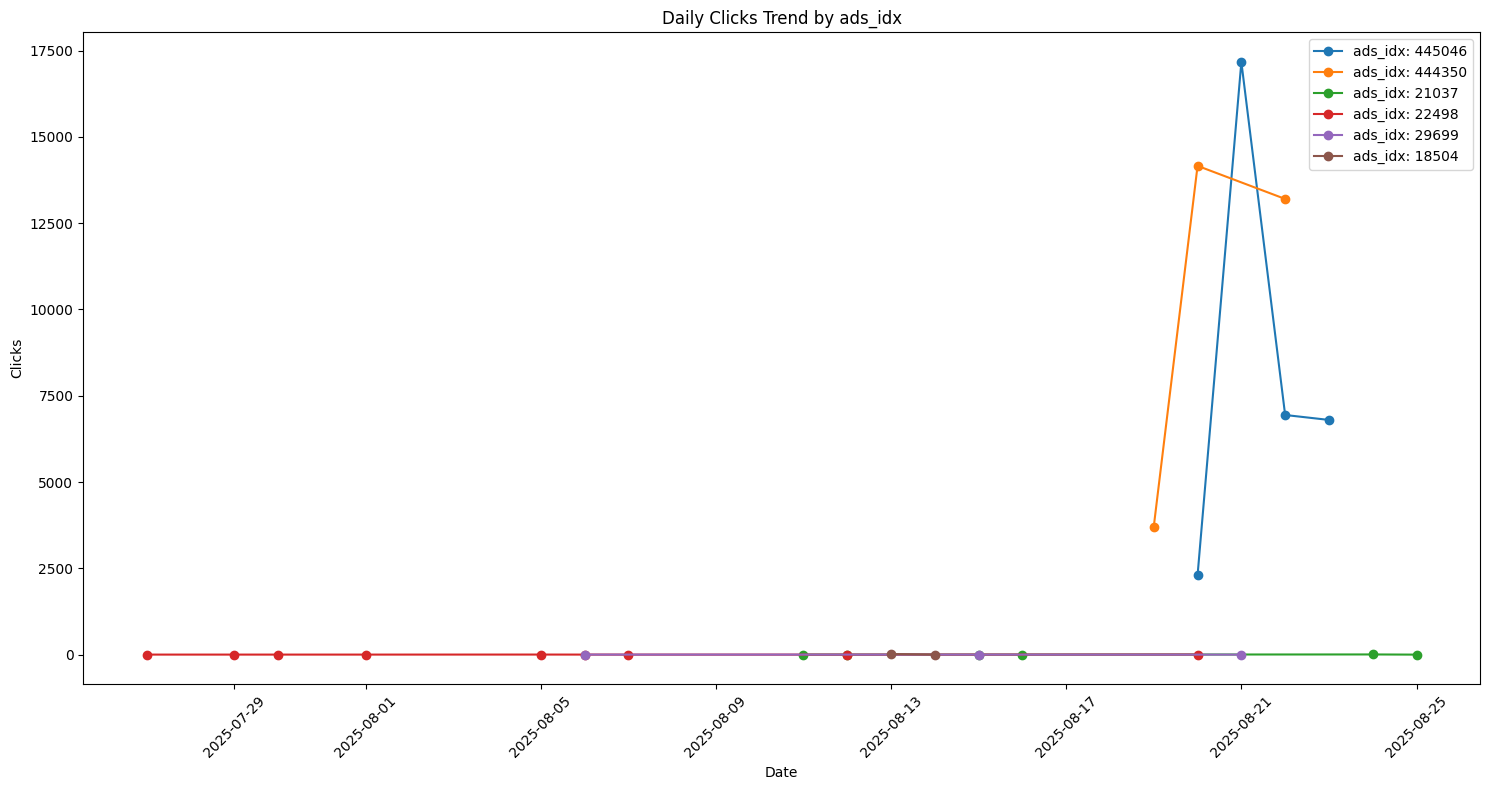

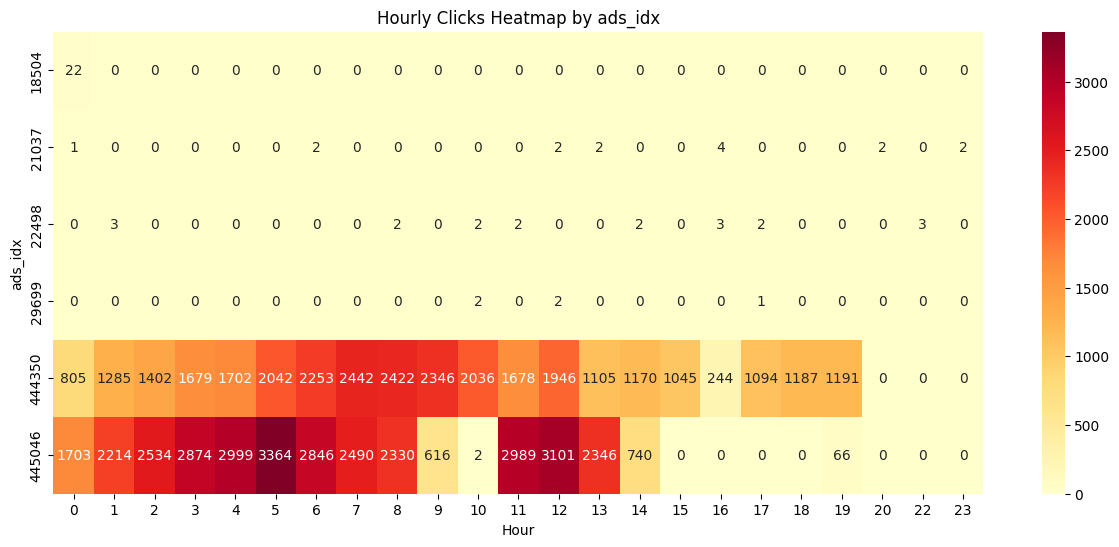

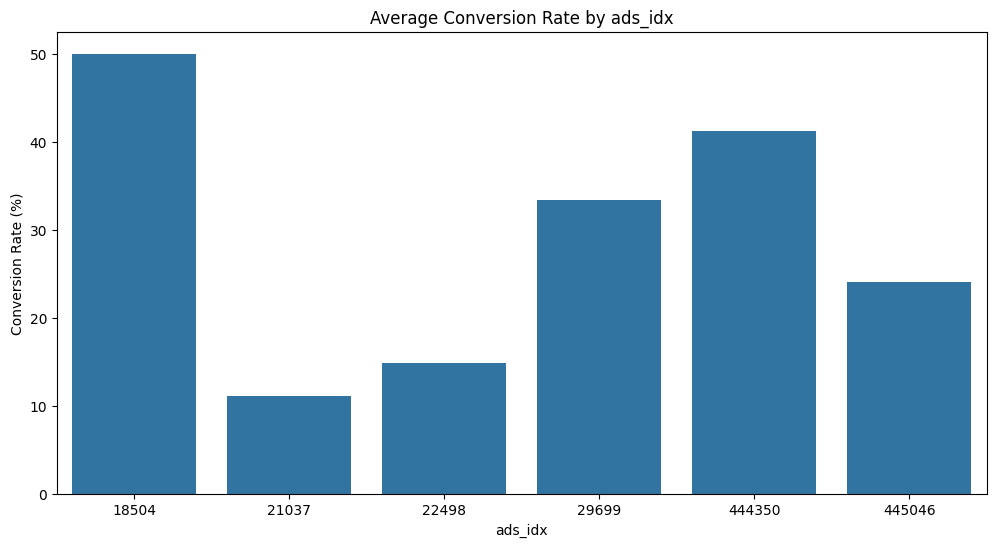

In [126]:
# 1) Daily clicks trend by ads_idx
plt.figure(figsize=(15, 8))
for ads_idx in mda_87['ads_idx'].unique():
    data = daily_stats[daily_stats['ads_idx'] == ads_idx]
    plt.plot(data['date'], data['clicks'], marker='o', label=f'ads_idx: {ads_idx}')

plt.title('Daily Clicks Trend by ads_idx')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2) Hourly clicks heatmap by ads_idx
pivot_hourly_clicks = hourly_stats.pivot(index='ads_idx', columns='hour', values='clicks').fillna(0)

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_hourly_clicks, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Hourly Clicks Heatmap by ads_idx')
plt.xlabel('Hour')
plt.ylabel('ads_idx')
plt.show()

# 3) Average conversion rate comparison by ads_idx
plt.figure(figsize=(12, 6))
avg_conversion_rate = daily_stats.groupby('ads_idx')['conversion_rate'].mean().reset_index()
sns.barplot(data=avg_conversion_rate, x='ads_idx', y='conversion_rate')
plt.title('Average Conversion Rate by ads_idx')
plt.ylabel('Conversion Rate (%)')
plt.show()

In [129]:
ads_list[ads_list['ads_idx']==444350]

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
7720,444350,WX4BWfxRA8,1,1658,1,1,조조의 꿈,https://i.imgur.com/TYzuYah.jpeg,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. App 내려받기...,받기,...,2025-08-23 00:00:00,0,100,2,180,120,2763600,NONE,2025-08-14 15:33:36 UTC,게임


In [130]:
records_cln[records_cln['ads_idx']==444350]

,click_key,ads_idx,dvc_idx,mda_idx,contract_price,media_price,click_day,click_time,click_date,exp_day,...,advid,regdate,ctit,conversion,ads_type,ads_category,ads_os_type,ads_order,ads_rejoin_type,domain
198,0000d25f72d85c3474797f46e8d52a777f74397a,444350,61868837,12,180,150,2025-08-20,13,2025-08-20 13:54:26,2025-09-19,...,1636e713-3b40-4e9e-b6d9-bab0343ac9ec,2025-08-20 13:59:12,286.0,1,1,1,2,2763600,NONE,게임
204,0000dc1682758f63cd547b4825fe50dfffd8541e,444350,61995138,58,180,170,2025-08-19,17,2025-08-19 17:45:53,2025-09-18,...,NaN,NaN,NaN,0,1,1,2,2763600,NONE,게임
321,00015ba789e44417d6ec0e308e285b4d47cdc906,444350,59685324,12,180,150,2025-08-20,9,2025-08-20 09:25:49,2025-09-19,...,NaN,NaN,NaN,0,1,1,2,2763600,NONE,게임
356,00017e5fed8bf43a23e9f05e6a1e0b024ab5567f,444350,56602457,58,180,170,2025-08-19,13,2025-08-19 13:09:56,2025-09-18,...,NaN,NaN,NaN,0,1,1,2,2763600,NONE,게임
456,0001f27a6bca58543cea96c2d5656d38cf89d848,444350,60078594,58,180,170,2025-08-22,1,2025-08-22 01:11:13,2025-09-21,...,NaN,NaN,NaN,0,1,1,2,2763600,NONE,게임
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854632,ffff1ec56ca007ee618cfe6d7d711a81cbbd009c,444350,48904168,58,180,170,2025-08-19,14,2025-08-19 14:02:09,2025-09-18,...,NaN,NaN,NaN,0,1,1,2,2763600,NONE,게임
16854635,ffff2283653eab533e42d46e19a282e7df1d1c4c,444350,35281944,12,180,150,2025-08-22,7,2025-08-22 07:22:25,2025-09-21,...,NaN,NaN,NaN,0,1,1,2,2763600,NONE,게임
16854689,ffff58764990e78f992290641b992f9a01862d2a,444350,61987727,58,180,170,2025-08-19,13,2025-08-19 13:27:40,2025-09-18,...,8a1ffe19-77ba-47a3-ad7d-eae05380b0fd,2025-08-19 13:27:42,2.0,1,1,1,2,2763600,NONE,게임
16854800,ffffbf97487940942a1bde7f480d0a92684034d5,444350,34467282,12,180,150,2025-08-22,13,2025-08-22 13:58:09,2025-09-21,...,NaN,NaN,NaN,0,1,1,2,2763600,NONE,게임


=> 게임 광고 가져오고 나서 매체사도 클릭 및 전환 증가 ~~~ 그리고 보통 유저들 오전에 활동 ~

In [132]:

# Summary statistics
print("=== Overall Summary by ads_idx ===")
summary = mda_87.groupby('ads_idx').agg({
    'click_key': 'count',
    'dvc_idx': 'nunique'
}).rename(columns={'click_key': 'total_clicks', 'dvc_idx': 'total_conversions'})
summary['total_conversion_rate'] = (summary['total_conversions'] / summary['total_clicks'] * 100).round(2)
print(summary)

=== Overall Summary by ads_idx ===
         total_clicks  total_conversions  total_conversion_rate
ads_idx                                                        
18504              22                 11                  50.00
21037              15                  6                  40.00
22498              19                 10                  52.63
29699               5                  3                  60.00
444350          31074              15461                  49.76
445046          33214              16358                  49.25


## 매체사 1051

In [136]:
mda_1051 = records_cln[records_cln['mda_idx']==1051]
mda_1051

,click_key,ads_idx,dvc_idx,mda_idx,contract_price,media_price,click_day,click_time,click_date,exp_day,...,advid,regdate,ctit,conversion,ads_type,ads_category,ads_os_type,ads_order,ads_rejoin_type,domain
538642,082be99d4eeb0d29fa80a9263eff82b219bc0e9f,426584,56575915,1051,3,2,2025-08-22,11,2025-08-22 11:49:35,2025-09-21,...,NaN,NaN,NaN,0,3,1,7,2746300,ADS_CODE_DAILY_UPDATE,게임


=> 클릭 수가 한 번밖에 없더라~~~ 테스트인가봉가~?

## 매체사 270

In [100]:
mda_270 = records_cln[records_cln['mda_idx']==270]

In [ ]:
mda_270

,click_key,ads_idx,dvc_idx,mda_idx,contract_price,media_price,click_day,click_time,click_date,exp_day,...,advid,regdate,ctit,conversion,ads_type,ads_category,ads_os_type,ads_order,ads_rejoin_type,domain
898,0003bf2ae23596575aa3b03710551eff8f82f69c,444026,35443871,270,0,1050,2025-08-15,13,2025-08-15 13:09:26,2025-09-14,...,NaN,NaN,NaN,0,9,6,2,2759900,NONE,게임
1344,000569ae73e0a667fde18e05d5e6b9c69fa40d11,441013,58247409,270,2,1,2025-08-15,17,2025-08-15 17:13:30,2025-09-14,...,fe535fe4-b1ee-4135-96ce-85bdd12ba6f0,2025-08-15 17:13:41,11.0,1,3,13,7,2764300,ADS_CODE_DAILY_UPDATE,운세
1434,0005be704fa880d610ad263bffdfb16253525bca,441904,61884854,270,2650,1386,2025-08-12,15,2025-08-12 15:37:18,2025-09-11,...,NaN,NaN,NaN,0,3,8,7,2532400,NONE,커머스
1554,000642e06e87841fb230fd39b45a8635cec68616,356956,60147732,270,5,3,2025-08-08,6,2025-08-08 06:51:36,2025-09-07,...,0e919534-e4b4-49fe-afe9-1bc619efee22,2025-08-08 06:51:41,5.0,1,3,13,7,2734500,ADS_CODE_DAILY_UPDATE,커머스
1720,0006d629d6cd9789a1e5ff10014c355e9a4ef35e,127894,61852259,270,3000,1470,2025-08-09,18,2025-08-09 18:34:34,2025-09-08,...,NaN,NaN,NaN,0,3,8,7,2574000,NONE,운세
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16853619,fffb14714bc0933ec052c35b199cfdbc433db02f,443660,51157883,270,170,84,2025-08-20,0,2025-08-20 00:38:28,2025-09-19,...,1922cf2d-6964-475a-957e-17b4f8a08cfc,2025-08-20 00:39:19,51.0,1,1,0,2,2758100,NONE,생활
16853770,fffbb92ce09ee79b3c98afb520919d5e5c87c4c4,356956,58497382,270,5,3,2025-08-06,0,2025-08-06 00:17:47,2025-09-05,...,4a8c6d70-8be9-4b1b-ab93-2a687f325b2c,2025-08-06 00:17:52,5.0,1,3,13,7,2734500,ADS_CODE_DAILY_UPDATE,커머스
16853885,fffc36a83c2616138979d27b8ab3cd6ab6ad7fa9,368471,61049946,270,0,149,2025-07-29,2,2025-07-29 02:58:47,2025-08-28,...,NaN,NaN,NaN,0,9,6,2,2559200,NONE,게임
16854321,fffde8b3c210b9415dd07d2be4ed51f43d61551f,443660,60253706,270,170,84,2025-08-15,0,2025-08-15 00:30:21,2025-09-14,...,72f6b7fd-e310-41ee-a1d7-371d15d275d5,2025-08-15 00:34:04,222.0,1,1,0,2,2758100,NONE,생활


In [143]:
# mda_270 ads_list
target_ads_idx = mda_270['ads_idx'].unique().tolist()
mda_270_adslist = ads_list[ads_list['ads_idx'].isin(target_ads_idx)]
mda_270_adslist

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
4,9716,NwZZq45Kgb,6,10,3,8,베이비러브 참여 신청,https://nextapps-nas.aws.appang.kr/icon/SDl2uC...,[참여방법]\n- 페이지 이동 > 베이버러브 참여신청 완료\n- 25-55세 SKT...,참여신청 (25세 ~ 55세),...,2029-11-29 00:00:00,25,55,2,600,480,2699900,NONE,2021-01-11 16:11:27 UTC,생활
5,9935,aKbPNZGRcw,1,778,3,8,숨어있는 휴면포인트 조회,https://i.imgur.com/jUnzKky.jpg,"휴면포인트 조회하고 포인트/캐시받자\n\n[이벤트안내]\n본 이벤트는 KB카드, 우...",포인트로 영화예매권 교환,...,9999-12-31 00:00:00,0,100,7,1500,1200,2592600,NONE,2021-02-01 10:21:48 UTC,금융
6,9982,ChpB9DGeNo,8,50,11,3,강원일보 네이버 뉴스,https://static.adbrix.igaworks.com/adpopcorn/2...,[참여방법]\n1.\'참여하기\' 버튼 터치하고 이벤트페이지로 이동\n2. 이벤트 ...,네이버 뉴스 구독,...,2030-01-01 00:00:00,0,100,7,230,160,2729900,NONE,2021-02-05 14:56:37 UTC,미디어/컨텐츠
10,10734,PuvgCEu9K0,1,850,12,11,아이쁨 무궁화 물든 동백 톤업크림 50ml,https://i.imgur.com/1GtFBWM.jpg,제품을 구매/결제하시면 리워드를 즉시 지급해 드립니다.\n -본 이벤트는 제품을 구...,구매,...,9999-12-31 00:00:00,0,100,7,3477,2200,1368589,REJOINABLE,2021-04-08 14:25:29 UTC,뷰티
21,10754,U1CACKtGuC,1,850,12,11,오직청춘 퓨어 알로에겔 300ml,https://i.imgur.com/p4ZwsDS.jpg,제품을 구매/결제하시면 리워드를 즉시 지급해 드립니다.\n -본 이벤트는 제품을 구...,구매,...,9999-12-31 00:00:00,0,100,7,6218,3980,1161144,REJOINABLE,2021-04-08 15:01:31 UTC,뷰티
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,446724,VERzhO5Jzk,86,1655,3,4,사바나 카사바 고양이 모래 3kg 3개 179922,https://cashplan-r2.uk/quiz-mission.png,[참여방법]\n1. 본문에서 퀴즈와 상품/장소 확인\n1-1. 퀴즈: 2번째 태그 ...,네이버스마트스토어 퀴즈,...,9999-12-31 23:59:59,0,100,7,18,12,1369916,ADS_CODE_DAILY_UPDATE,2025-08-24 09:47:38 UTC,커머스
9413,446731,Zcwsj3rgAw,39,318,3,4,용가리전자담배 제우스맥스 코일 맞추기 8.24,https://app.autoring.kr/home/ajax/image.php?fi...,용가리전자담배 제우스맥스 코일 리뷰클릭후 주소창 복사붙여넣어 맞추기\n\n\n키워드...,퀴즈 맞추기,...,9999-12-31 23:59:59,0,100,7,16,11,1369916,NONE,2025-08-24 10:12:16 UTC,생활
9416,446740,LkhGlSmLIK,39,318,3,4,NUTRALIFE 카테킨 맞추기 8.24,https://app.autoring.kr/home/ajax/image.php?fi...,리뷰클릭후 주소창 복사붙여넣어 맞추기\n\n사진을 참고해서 해당상품 클릭해보세요!．...,퀴즈 맞추기,...,9999-12-31 23:59:59,0,100,7,13,9,1369916,NONE,2025-08-24 13:02:59 UTC,의료/건강
9450,446810,w65t1hsgPI,80,1505,3,4,[플레이스 퀴즈] 맘보식당 해운대송정본점 (18780),https://192985098f0772e5.kinxzone.com/img/thum...,[참여 방법]\n1. 검색 키워드를 복사하기\n2. 미션하러 가기 클릭 후 키워드를...,참여,...,9999-12-31 23:59:59,0,100,7,20,14,1369916,NONE,2025-08-24 15:57:55 UTC,식당/카페


In [147]:
print("매체사 270 광고 도메인 비중", (mda_270_adslist['domain'].value_counts()/len(mda_270_adslist)*100).round(1))
print("\n참여정보 도메인 비중", (mda_270['domain'].value_counts(normalize=True) * 100).round(2))

매체사 270 광고 도메인 비중 domain
커머스        25.8
게임         15.9
생활         12.8
식당/카페      12.7
의료/건강       6.5
뷰티          5.1
기타          5.0
금융          4.3
식음료         4.0
미디어/컨텐츠     2.8
운동/스포츠      2.8
운세          0.9
교육          0.7
채용          0.3
비영리/공공      0.3
Name: count, dtype: float64

참여정보 도메인 비중 domain
게임         52.02
커머스        23.19
운세         10.08
금융          3.05
생활          2.26
미디어/컨텐츠     2.19
뷰티          1.30
의료/건강       1.26
비영리/공공      1.25
식당/카페       1.14
채용          0.76
식음료         0.51
운동/스포츠      0.46
기타          0.44
교육          0.09
Name: proportion, dtype: float64


=> 광고 중 게임 15% 지만 참여 정보 비중은 50%

In [185]:
grp = mda_270.groupby(['dvc_idx'], dropna=False)
summary = grp.agg(
    clicks      = ('click_key', 'count'),
    conv        = ('conversion', 'sum'),
    conv_rate   = ('conversion', lambda x: x.mean() if len(x) else 0),
    uniq_ads    = ('ads_idx', 'unique'),
    uniq_media  = ('mda_idx', 'unique'),
    first_click = ('click_time', 'min'),
    last_click  = ('click_time', 'max'),
    uniq_domain = ('domain', 'nunique')
).reset_index()


summary_top = summary.sort_values(['clicks','conv'], ascending=[False, False])
summary_top


,dvc_idx,clicks,conv,conv_rate,uniq_ads,uniq_media,first_click,last_click,uniq_domain
2238,61031602,470,311,0.661702,"[444277, 440258, 438175, 444505, 445960, 43871...",[270],0,21,14
922,50492374,438,78,0.178082,"[339422, 314085, 393624, 426586, 436643, 13064...",[270],0,23,13
946,50730243,432,3,0.006944,"[72964, 28928, 360377, 70424, 93023, 95878, 31...",[270],0,23,2
2209,60978722,405,33,0.081481,"[426812, 426811, 439163, 27612, 22265, 444244,...",[270],0,23,11
147,33302644,345,142,0.411594,"[439889, 243651, 444278, 437525, 444284, 44607...",[270],5,22,11
...,...,...,...,...,...,...,...,...,...
3136,62069063,1,0,0.000000,[440167],[270],16,16,1
3138,62069365,1,0,0.000000,[439973],[270],16,16,1
3142,62070413,1,0,0.000000,[444026],[270],19,19,1
3144,62072360,1,0,0.000000,[444026],[270],23,23,1


In [154]:
mda_270.columns

Index(['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'contract_price',
       'media_price', 'click_day', 'click_time', 'click_date', 'exp_day',
       'network', 'user_ip', 'rwd_idx', 'advid', 'regdate', 'ctit',
       'conversion', 'ads_type', 'ads_category', 'ads_os_type', 'ads_order',
       'ads_rejoin_type', 'domain'],
      dtype='object')

In [164]:
print("OS 타입 (1:AppStore, 2:GooglePlay, 3:원스토어, 7:Web, 8:갤럭시 스토어)")
print("\n 270매체사 os type 비중", mda_270['ads_os_type'].value_counts())

OS 타입 (1:AppStore, 2:GooglePlay, 3:원스토어, 7:Web, 8:갤럭시 스토어)

 270매체사 os type 비중 ads_os_type
7    29971
2    29006
3     2816
Name: count, dtype: int64


=> 270 매체사는 앱스토어 없고 원스토어, 구글플레이, 웹
=> 원스토어 : 대한민국 3대 통신사와 네이버가 만든 안드로이드용 앱스토어

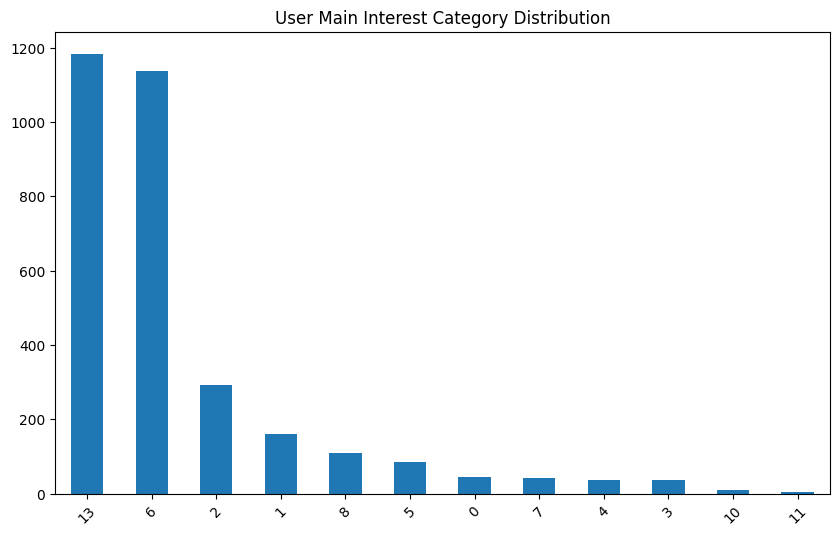

In [186]:
# 유저별 선호 카테고리 분석
user_category_pref = mda_270.groupby(['dvc_idx', 'ads_category']).size().unstack(fill_value=0)

# 각 유저의 주요 관심 카테고리 찾기
user_main_category = user_category_pref.idxmax(axis=1)
category_distribution = user_main_category.value_counts()

plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar', title='User Main Interest Category Distribution')
plt.xticks(rotation=45)
plt.show()

아이브에서 구분해둔 광고 카테고리 - 0: 카테고리 선택안함, 1: 앱(간편적립), 3: 구독(간편적립), 4: 간편미션-퀴즈(간편적립), 13: 간편미션(간편적립), 2: 경험하기(게임적립)/앱(간편적립) - cpi,cpe, 5: 경험하기(게임적립) - cpa, 6: 멀티보상(게임적립), 8: 무료참여(참여적립), 7: 금융(참여적립), 10: 유료참여(참여적립), 11: 쇼핑-상품별카테고리(쇼핑적립), 12: 제휴몰(쇼핑적립)

뭔가 여기서 유저를 어떻게 뽑아낼 수 있을까....

흠 쓰읍ㅇ
유저 세그먼트를 할려면...



In [182]:
mda_270.columns

Index(['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'contract_price',
       'media_price', 'click_day', 'click_time', 'click_date', 'exp_day',
       'network', 'user_ip', 'rwd_idx', 'advid', 'regdate', 'ctit',
       'conversion', 'ads_type', 'ads_category', 'ads_os_type', 'ads_order',
       'ads_rejoin_type', 'domain'],
      dtype='object')

In [187]:
# 유저 참여 도메인 10개 이상, 5개 10개 사이, 5개 이하, 1개만 참여 구분 분석

# 유저별 참여 도메인 수 계산
user_domain_count = mda_270.groupby('dvc_idx')['domain'].nunique().reset_index()
user_domain_count.columns = ['dvc_idx', 'domain_count']

print(f"총 유저 수: {len(user_domain_count)}")
print(f"도메인 참여 수 분포:")
print(user_domain_count['domain_count'].value_counts().sort_index())

# 도메인 참여 수에 따른 유저 분류
def classify_user_domain_diversity(domain_count):
    if domain_count >= 10:
        return '다양성 탐험가 (10개+)'
    elif domain_count >= 6:
        return '적극적 참여자 (6-9개)'
    elif domain_count >= 2:
        return '선택적 참여자 (2-5개)'
    else:
        return '전문 참여자 (1개)'

user_domain_count['user_type'] = user_domain_count['domain_count'].apply(classify_user_domain_diversity)

# 분류 결과
segment_distribution = user_domain_count['user_type'].value_counts()
print("\n유저 도메인 다양성 세그먼트:")
print(segment_distribution)

# 비율 계산
segment_percentage = (segment_distribution / len(user_domain_count) * 100).round(2)
print("\n세그먼트 비율:")
for segment, percentage in segment_percentage.items():
    print(f"{segment}: {percentage}%")

총 유저 수: 3146
도메인 참여 수 분포:
domain_count
1     1177
2      633
3      441
4      292
5      170
6      147
7       97
8       54
9       49
10      29
11      28
12      15
13      10
14       2
15       2
Name: count, dtype: int64

유저 도메인 다양성 세그먼트:
user_type
선택적 참여자 (2-5개)    1536
전문 참여자 (1개)       1177
적극적 참여자 (6-9개)     347
다양성 탐험가 (10개+)      86
Name: count, dtype: int64

세그먼트 비율:
선택적 참여자 (2-5개): 48.82%
전문 참여자 (1개): 37.41%
적극적 참여자 (6-9개): 11.03%
다양성 탐험가 (10개+): 2.73%


In [189]:
# 각 세그먼트의 상세 행동 분석
def analyze_segments():
    # 유저 타입을 원본 데이터에 매핑
    mda_270_with_segments = mda_270.merge(user_domain_count[['dvc_idx', 'user_type']], on='dvc_idx')
    
    # 세그먼트별 성과 분석
    segment_analysis = mda_270_with_segments.groupby('user_type').agg({
        'dvc_idx': 'nunique',           # 유저 수
        'click_key': 'count',           # 총 클릭수
        'conversion': 'sum',            # 총 전환수
        'domain': 'nunique'             # 참여 도메인 수 (검증용)
    }).round(2)
    
    # 유저당 평균 지표 계산
    segment_analysis['avg_clicks_per_user'] = segment_analysis['click_key'] / segment_analysis['dvc_idx']
    segment_analysis['avg_conversions_per_user'] = segment_analysis['conversion'] / segment_analysis['dvc_idx']
    segment_analysis['conversion_rate'] = (segment_analysis['conversion'] / segment_analysis['click_key'] * 100).round(2)
    
    return mda_270_with_segments, segment_analysis

mda_270_segments, segment_performance = analyze_segments()

print("\n세그먼트별 성과 분석:")
print(segment_performance)


세그먼트별 성과 분석:
                dvc_idx  click_key  conversion  domain  avg_clicks_per_user  \
user_type                                                                     
다양성 탐험가 (10개+)       86      10644        5079      15           123.767442   
선택적 참여자 (2-5개)     1536      28042       14025      15            18.256510   
적극적 참여자 (6-9개)      347      16496        8533      15            47.538905   
전문 참여자 (1개)        1177       6611        1911      14             5.616822   

                avg_conversions_per_user  conversion_rate  
user_type                                                  
다양성 탐험가 (10개+)                 59.058140            47.72  
선택적 참여자 (2-5개)                  9.130859            50.01  
적극적 참여자 (6-9개)                 24.590778            51.73  
전문 참여자 (1개)                     1.623619            28.91  


In [190]:
mda_270

,click_key,ads_idx,dvc_idx,mda_idx,contract_price,media_price,click_day,click_time,click_date,exp_day,...,advid,regdate,ctit,conversion,ads_type,ads_category,ads_os_type,ads_order,ads_rejoin_type,domain
898,0003bf2ae23596575aa3b03710551eff8f82f69c,444026,35443871,270,0,1050,2025-08-15,13,2025-08-15 13:09:26,2025-09-14,...,NaN,NaN,NaN,0,9,6,2,2759900,NONE,게임
1344,000569ae73e0a667fde18e05d5e6b9c69fa40d11,441013,58247409,270,2,1,2025-08-15,17,2025-08-15 17:13:30,2025-09-14,...,fe535fe4-b1ee-4135-96ce-85bdd12ba6f0,2025-08-15 17:13:41,11.0,1,3,13,7,2764300,ADS_CODE_DAILY_UPDATE,운세
1434,0005be704fa880d610ad263bffdfb16253525bca,441904,61884854,270,2650,1386,2025-08-12,15,2025-08-12 15:37:18,2025-09-11,...,NaN,NaN,NaN,0,3,8,7,2532400,NONE,커머스
1554,000642e06e87841fb230fd39b45a8635cec68616,356956,60147732,270,5,3,2025-08-08,6,2025-08-08 06:51:36,2025-09-07,...,0e919534-e4b4-49fe-afe9-1bc619efee22,2025-08-08 06:51:41,5.0,1,3,13,7,2734500,ADS_CODE_DAILY_UPDATE,커머스
1720,0006d629d6cd9789a1e5ff10014c355e9a4ef35e,127894,61852259,270,3000,1470,2025-08-09,18,2025-08-09 18:34:34,2025-09-08,...,NaN,NaN,NaN,0,3,8,7,2574000,NONE,운세
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16853619,fffb14714bc0933ec052c35b199cfdbc433db02f,443660,51157883,270,170,84,2025-08-20,0,2025-08-20 00:38:28,2025-09-19,...,1922cf2d-6964-475a-957e-17b4f8a08cfc,2025-08-20 00:39:19,51.0,1,1,0,2,2758100,NONE,생활
16853770,fffbb92ce09ee79b3c98afb520919d5e5c87c4c4,356956,58497382,270,5,3,2025-08-06,0,2025-08-06 00:17:47,2025-09-05,...,4a8c6d70-8be9-4b1b-ab93-2a687f325b2c,2025-08-06 00:17:52,5.0,1,3,13,7,2734500,ADS_CODE_DAILY_UPDATE,커머스
16853885,fffc36a83c2616138979d27b8ab3cd6ab6ad7fa9,368471,61049946,270,0,149,2025-07-29,2,2025-07-29 02:58:47,2025-08-28,...,NaN,NaN,NaN,0,9,6,2,2559200,NONE,게임
16854321,fffde8b3c210b9415dd07d2be4ed51f43d61551f,443660,60253706,270,170,84,2025-08-15,0,2025-08-15 00:30:21,2025-09-14,...,72f6b7fd-e310-41ee-a1d7-371d15d275d5,2025-08-15 00:34:04,222.0,1,1,0,2,2758100,NONE,생활


In [192]:
mda_270.columns

Index(['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'contract_price',
       'media_price', 'click_day', 'click_time', 'click_date', 'exp_day',
       'network', 'user_ip', 'rwd_idx', 'advid', 'regdate', 'ctit',
       'conversion', 'ads_type', 'ads_category', 'ads_os_type', 'ads_order',
       'ads_rejoin_type', 'domain'],
      dtype='object')

for 유저 클러스터링

=> dvc_idx 컬럼을 중심으로 파생되는 모든 정보들 만들어서 돌려야함

=> group by
('user_ip','nunique') - 디바이스 인데스당 아이피 갯수


### 매체 270 유저 중심 테이블 만들기

In [196]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def create_domain_features():
    # 각 유저별 도메인 참여 비율 계산
    user_domain_matrix = mda_270.groupby(['dvc_idx', 'domain']).size().unstack(fill_value=0)
    
    # 비율로 정규화 (각 유저의 총 클릭을 100%로)
    user_domain_ratios = user_domain_matrix.div(user_domain_matrix.sum(axis=1), axis=0)
    
    # 주요 도메인별 특성 변수 생성
    domain_features = pd.DataFrame(index=user_domain_ratios.index)
    
    # 각 도메인별 참여 비율
    for domain in user_domain_ratios.columns:
        domain_features[f'{domain}_ratio'] = user_domain_ratios[domain]
    
    # 도메인 전문성 지표
    domain_features['max_domain_ratio'] = user_domain_ratios.max(axis=1)  # 가장 집중한 도메인 비율
    domain_features['domain_entropy'] = -np.sum(user_domain_ratios * np.log(user_domain_ratios + 1e-10), axis=1)  # 다양성
    
    # 주요 도메인 라벨
    domain_features['main_domain'] = user_domain_ratios.idxmax(axis=1)
    
    return domain_features, user_domain_ratios

domain_features, user_domain_matrix = create_domain_features()
create_domain_features()

(          게임_ratio  교육_ratio  금융_ratio  기타_ratio  미디어/컨텐츠_ratio  뷰티_ratio  \
 dvc_idx                                                                     
 8554724   1.000000  0.000000  0.000000  0.000000       0.000000  0.000000   
 11269781  0.333333  0.000000  0.000000  0.000000       0.000000  0.000000   
 12987637  1.000000  0.000000  0.000000  0.000000       0.000000  0.000000   
 14188481  0.101493  0.008955  0.026866  0.053731       0.020896  0.044776   
 14450713  1.000000  0.000000  0.000000  0.000000       0.000000  0.000000   
 ...            ...       ...       ...       ...            ...       ...   
 62070082  0.800000  0.000000  0.000000  0.000000       0.000000  0.000000   
 62070413  1.000000  0.000000  0.000000  0.000000       0.000000  0.000000   
 62071432  0.666667  0.000000  0.000000  0.000000       0.000000  0.000000   
 62072360  1.000000  0.000000  0.000000  0.000000       0.000000  0.000000   
 62076558  0.000000  0.000000  0.000000  0.000000       0.000000